# Unsupervised Learning - Predict the type of vehicle

**Data Description:**

The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.

**Context:**
The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

**Attribute Information:**
● All the features are geometric features extracted from the silhouette.
● All are numeric in nature.

**Objective:**
Based on the independent features, predict the type of vehicle 

In [1]:
# Import required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from sklearn import svm
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RepeatedStratifiedKFold

In [2]:
# import the dataset

df1 = pd.read_csv('vehicle-1.csv')

## Exploratory Data Analysis

In [3]:
df1.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

    * All the variables are continuous except target variable (class)
    * Nulls are present in the dataset

In [4]:
df1.shape

(846, 19)

**Dataset has 846 rows and 19 columns**

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

**Observations -**

* class has datatype object. Since this is the target variable, this will be converted to categorical down the line.


* Total rows in the dataset is 846 rows. Most of the columns do not have 846 rows. This could be due to missing values, NaN etc. 

In [6]:
dups = df1[df1.duplicated()]
dups

Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

**Duplicates are not found in dataset.**

In [7]:
# five point summary 

df1.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

* Data looks reasonable.


* Mean of "scaled_variance.1" is higher than median, hence this column would be right skewed.


* Data belongs to remaining columns looks like Normally distributed.

In [8]:
print('Skewness of compactness                 : ', df1["compactness"].skew())
print('Skewness of circularity                 : ', df1["circularity"].skew())
print('Skewness of distance_circularity        : ', df1["distance_circularity"].skew())
print('Skewness of radius_ratio                : ', df1["radius_ratio"].skew())
print('Skewness of pr.axis_aspect_ratio        : ', df1["pr.axis_aspect_ratio"].skew())
print('Skewness of max.length_aspect_ratio     : ', df1["max.length_aspect_ratio"].skew())
print('Skewness of scatter_ratio               : ', df1["scatter_ratio"].skew())
print('Skewness of elongatedness               : ', df1["elongatedness"].skew())
print('Skewness of pr.axis_rectangularity      : ', df1["pr.axis_rectangularity"].skew())
print('Skewness of max.length_rectangularity   : ', df1["max.length_rectangularity"].skew())
print('Skewness of scaled_variance             : ', df1["scaled_variance"].skew())
print('Skewness of scaled_variance.1           : ', df1["scaled_variance.1"].skew())
print('Skewness of scaled_radius_of_gyration   : ', df1["scaled_radius_of_gyration"].skew())
print('Skewness of scaled_radius_of_gyration.1 : ', df1["scaled_radius_of_gyration.1"].skew())
print('Skewness of skewness_about              : ', df1["skewness_about"].skew())
print('Skewness of skewness_about.1            : ', df1["skewness_about.1"].skew())
print('Skewness of skewness_about.2            : ', df1["skewness_about.2"].skew())
print('Skewness of hollows_ratio               : ', df1["hollows_ratio"].skew())

Skewness of compactness                 :  0.38127063263996497
Skewness of circularity                 :  0.2618093968095735
Skewness of distance_circularity        :  0.10658485862853824
Skewness of radius_ratio                :  0.39497766785104316
Skewness of pr.axis_aspect_ratio        :  3.83036207531066
Skewness of max.length_aspect_ratio     :  6.7783936191089476
Skewness of scatter_ratio               :  0.6072705840142789
Skewness of elongatedness               :  0.04784701481809352
Skewness of pr.axis_rectangularity      :  0.7708887331289768
Skewness of max.length_rectangularity   :  0.2563591641353724
Skewness of scaled_variance             :  0.6515982489177394
Skewness of scaled_variance.1           :  0.8420338539822296
Skewness of scaled_radius_of_gyration   :  0.2793173322622561
Skewness of scaled_radius_of_gyration.1 :  2.083496485501098
Skewness of skewness_about              :  0.7765187097549048
Skewness of skewness_about.1            :  0.6880171692243372
Skewnes

In [9]:
# get the profile report of the dataset.

pandas_profiling.ProfileReport(df1)

**Observations from Profile Report -**

* scatter_ratio is highly correlated with distance_circularity 

* pr.axis_rectangularity is highly correlated with scatter_ratio

* max.length_rectangularity is highly correlated with circularity 

* scaled_variance is highly correlated with pr.axis_rectangularity 

* scaled_variance.1 is highly correlated with scaled_variance 

* scaled_radius_of_gyration is highly correlated with circularity 

Profile report has identified correlations between few variables, these correlations will be verified using a correlation matrix, and appropriate actions will be take in further steps.

In [10]:
# check whether any NaN values are present in the dataset

df1.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

* Most of the columns have NaN values. 

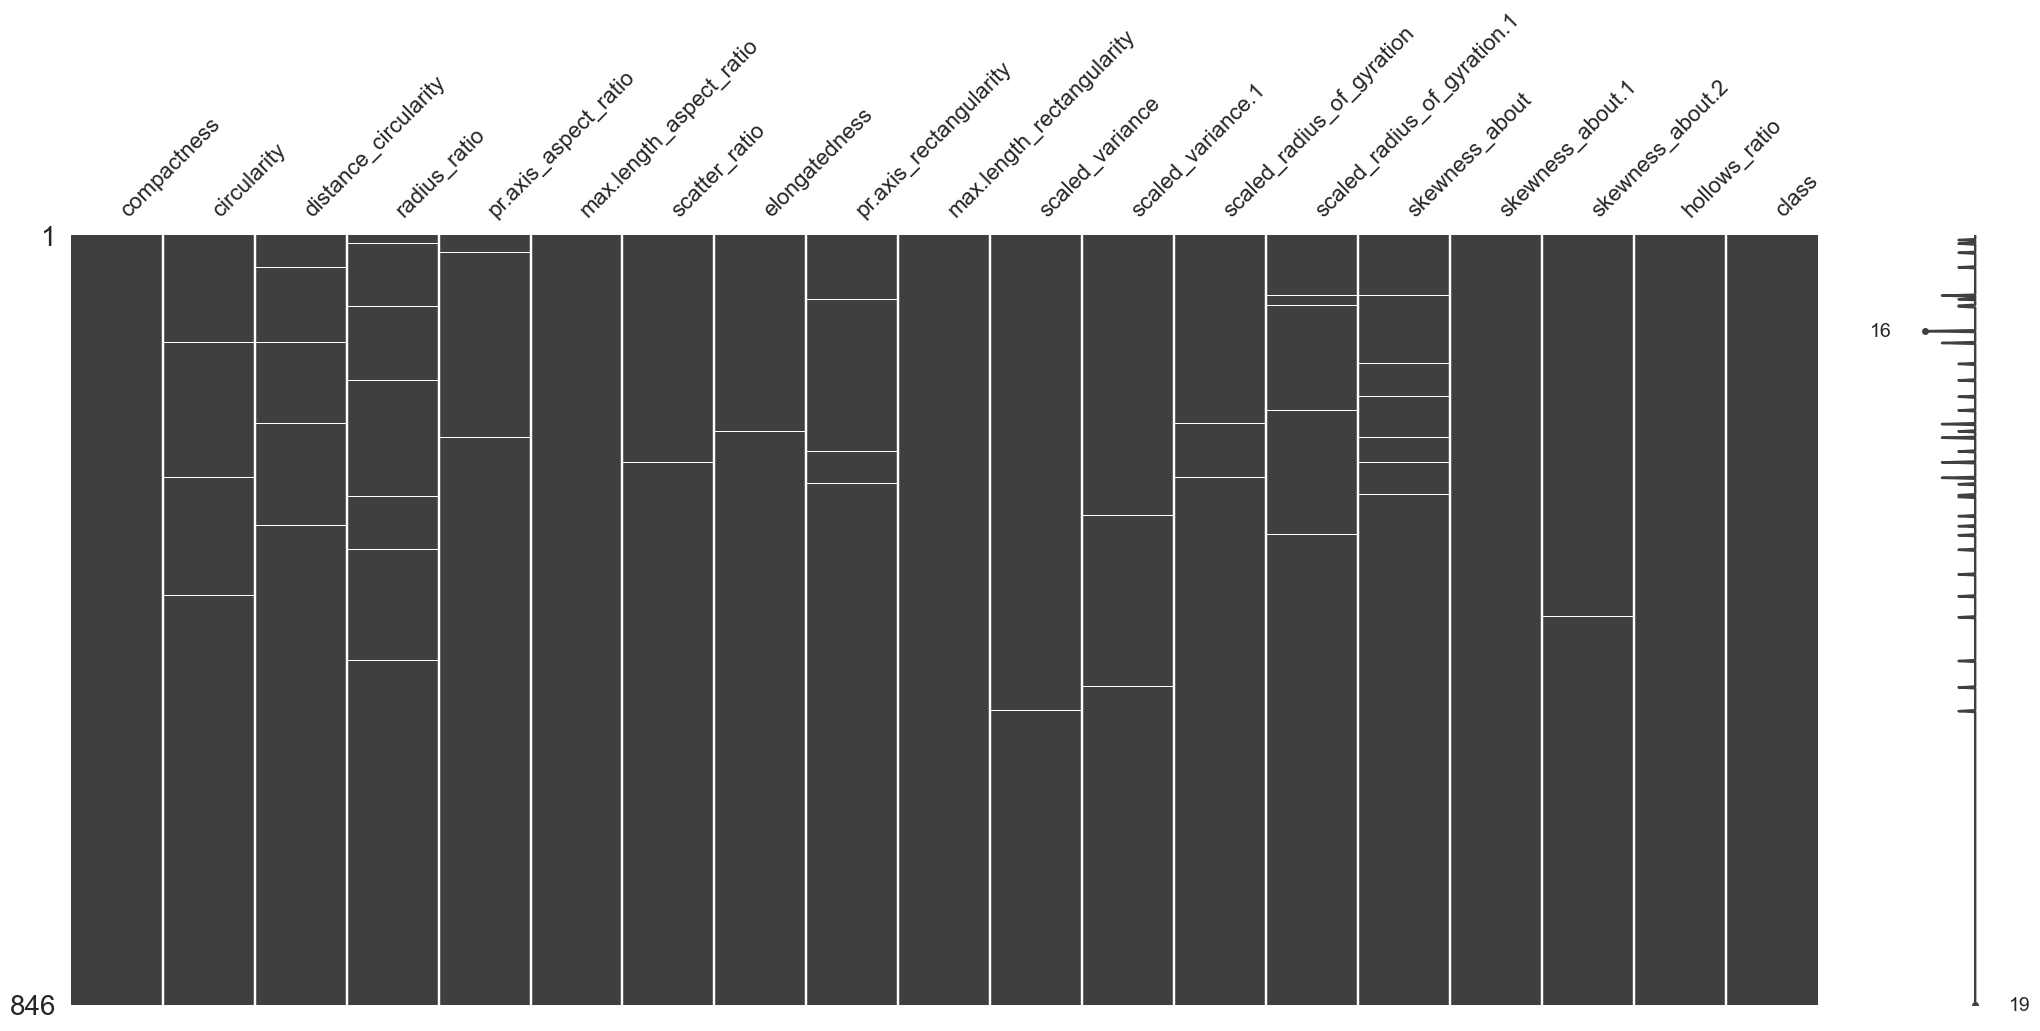

In [11]:
# visualization of missing values in the dataset

msno.matrix(df1)

    * Columns with no gap's (no horizontal bars) denotes missing values are not present.
    * Columns with gap's (horizontal bars) denotes missing values are present. This approximately says how many missing 
      values present in those columns.

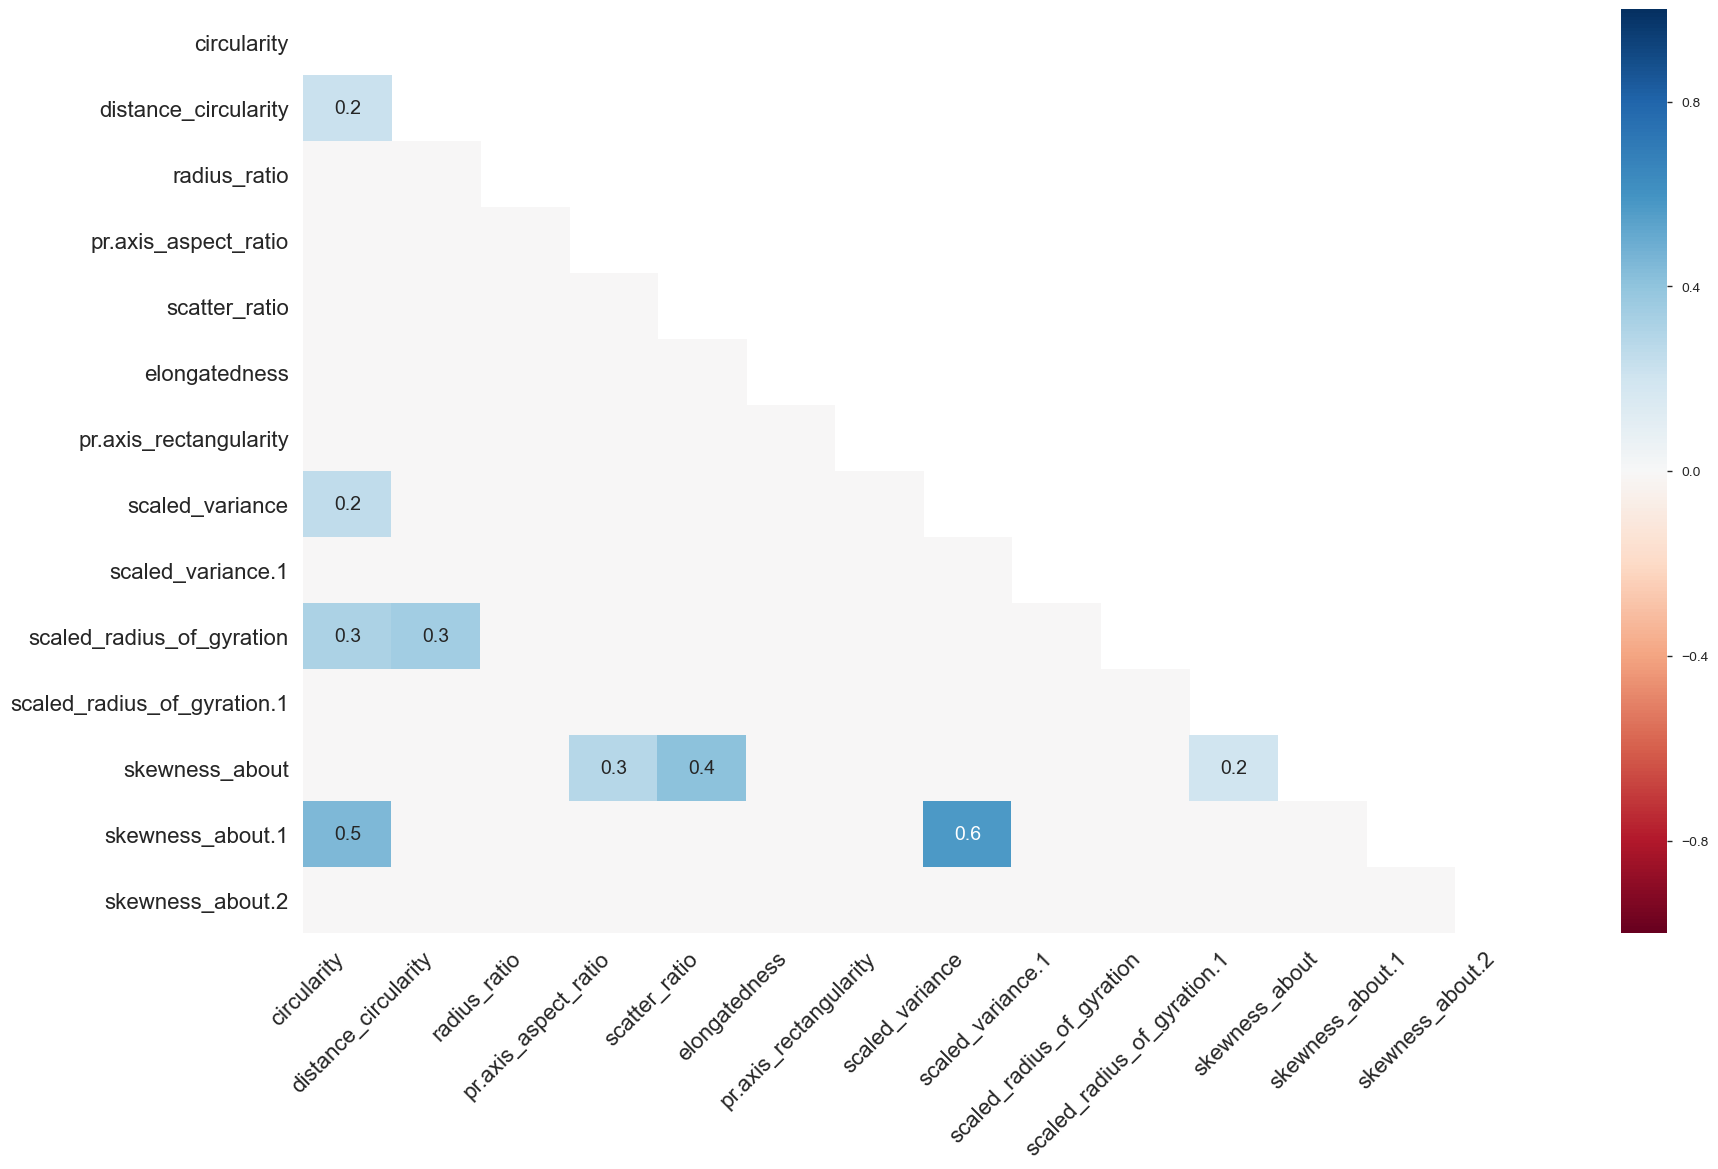

In [12]:
# Correlation matrix of missing values in the dataset

msno.heatmap(df1)

**Note :**

    * Columns that have no missing values will not show up in the heatmap. 
    * If the columns have their correlation value rounds down to 0 (>-0.05 or < 0.05), then no value will be displayed.
    * A value of -1 means, wherever the first column is missing then the second column will not be available.  
    * A value of 1 means, wherever the first column is missing then the second column will not be available.  
    * A value of 0.2, 0.3, 0.5, 0.6 etc denotes when the first column is missing then the second column is missing in 
      respective ratio's.

In [13]:
df2_m = df1.copy()

# this is to retain the original dataset in df1, and use df2_m for data manipulations

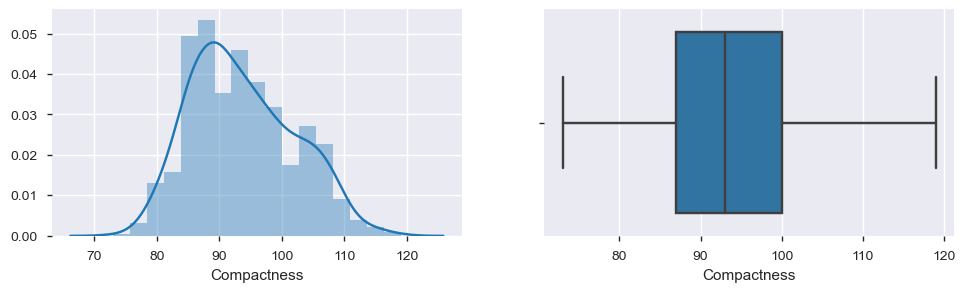


Number of missing values in Compactness :  0


In [14]:
# Hist and Box plot for column compactness

plt.figure(figsize = (18,10))
plt.subplot(3,3,1)
sns.distplot(df2_m.compactness)
plt.xlabel("Compactness")

plt.subplot(3,3,2)
sns.boxplot(df2_m.compactness)
plt.xlabel("Compactness")
plt.show()

print('\nNumber of missing values in Compactness : ', df1['compactness'].isna().sum())

**Observations -**

    * Data in Compactness looks close to normally distributed.
    * No outliers in Compactness
    * Number of missing values in Compactness is  0

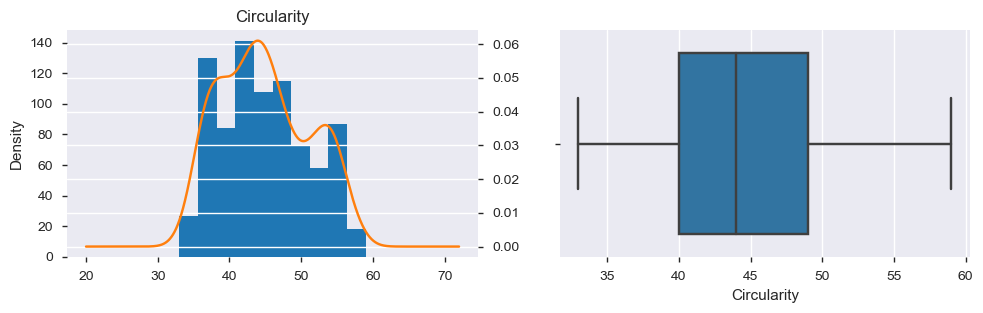


Number of missing values in Circularity :  5


In [15]:
# Hist and Box plot for column circularity

plt.figure(figsize = (18,10))
plt.subplot(3,3,1)
#sns.distplot wont work for columns with float datatype.Conversion of column to integer datatype is not possible since the
# column is having missing values. Hence applied histogram in the background and kde on secondary_y axis. 
ax1 = df2_m["circularity"].plot(kind='hist') 
df2_m["circularity"].plot(kind='kde', ax=ax1, secondary_y=True, title="Circularity")

plt.subplot(3,3,2)
sns.boxplot(df2_m.circularity)
plt.xlabel("Circularity")
plt.show()

print('\nNumber of missing values in Circularity : ', df1['circularity'].isna().sum())

**Observations -**

    * Data in Circularity looks multimodal(more than one peaks).
    * No outliers in Circularity
    * Number of missing values in Circularity is  5

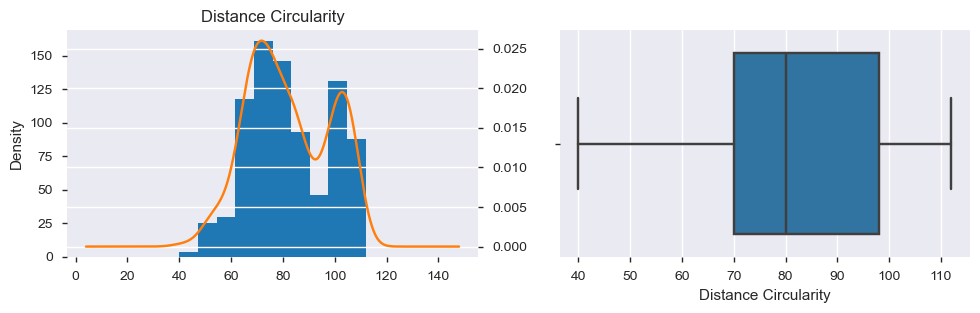


Number of missing values in distance_circularity :  4


In [16]:
# Hist and Box plot for column distance_circularity

plt.figure(figsize = (18,10))
plt.subplot(3,3,1)
#sns.distplot wont work for columns with float datatype.Conversion of column to integer datatype is not possible since the
# column is having missing values. Hence applied histogram in the background and kde on secondary_y axis. 
ax1 = df2_m["distance_circularity"].plot(kind='hist')
df2_m["distance_circularity"].plot(kind='kde', ax=ax1, secondary_y=True, title="Distance Circularity")

plt.subplot(3,3,2)
sns.boxplot(df2_m.distance_circularity)
plt.xlabel("Distance Circularity")
plt.show()

print('\nNumber of missing values in distance_circularity : ', df1['distance_circularity'].isna().sum())

**Observations -**

    * Data in distance_circularity looks bimodal(two peaks).
    * No outliers in distance_circularity. 
    * Number of missing values in distance_circularity is 4

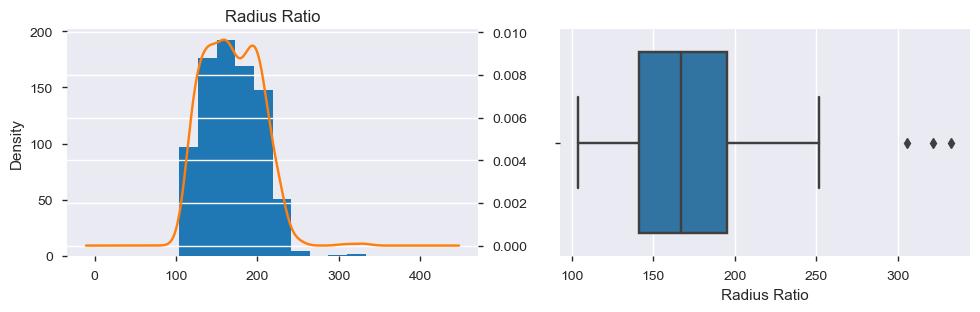


Number of missing values in radius_ratio :  6


In [17]:
# Hist and Box plot for column radius_ratio

plt.figure(figsize = (18,10))
plt.subplot(3,3,1)
#sns.distplot wont work for columns with float datatype.Conversion of column to integer datatype is not possible since the
# column is having missing values. Hence applied histogram in the background and kde on secondary_y axis. 
ax1 = df2_m["radius_ratio"].plot(kind='hist')
df2_m["radius_ratio"].plot(kind='kde', ax=ax1, secondary_y=True, title="Radius Ratio")

plt.subplot(3,3,2)
sns.boxplot(df2_m.radius_ratio)
plt.xlabel("Radius Ratio")
plt.show()

print('\nNumber of missing values in radius_ratio : ', df1['radius_ratio'].isna().sum())

**Observations -**

    * Data in radius_ratio looks normally distributed.
    * Few outliers present in radius_ratio. 
    * Number of missing values in radius_ratio is 6.

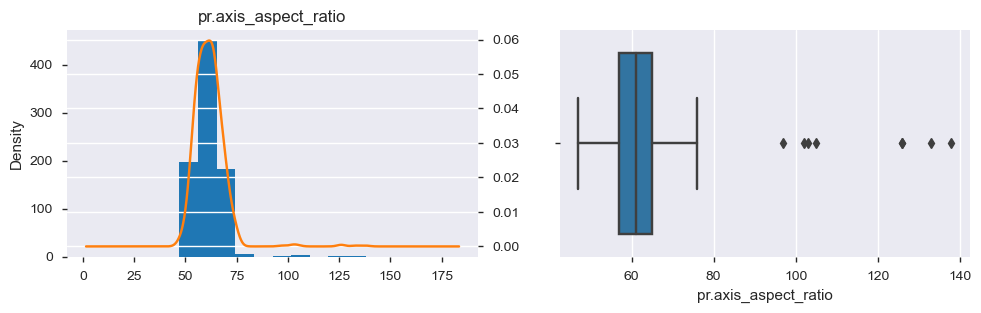


Number of missing values in pr.axis_aspect_ratio :  2


In [18]:
# Hist and Box plot for column pr.axis_aspect_ratio

plt.figure(figsize = (18,10))
plt.subplot(3,3,1)
#sns.distplot wont work for columns with float datatype.Conversion of column to integer datatype is not possible since the
# column is having missing values. Hence applied histogram in the background and kde on secondary_y axis. 
ax1 = df2_m["pr.axis_aspect_ratio"].plot(kind='hist')
df2_m["pr.axis_aspect_ratio"].plot(kind='kde', ax=ax1, secondary_y=True, title="pr.axis_aspect_ratio")

plt.subplot(3,3,2)
sns.boxplot(df2_m["pr.axis_aspect_ratio"])
plt.xlabel("pr.axis_aspect_ratio")
plt.show()

print('\nNumber of missing values in pr.axis_aspect_ratio : ', df1['pr.axis_aspect_ratio'].isna().sum())

**Observations -**

    * Data in pr.axis_aspect_ratio has positive skewness due to outliers.  
    * Outliers present in pr.axis_aspect_ratio. 
    * Number of missing values in pr.axis_aspect_ratio is 2.

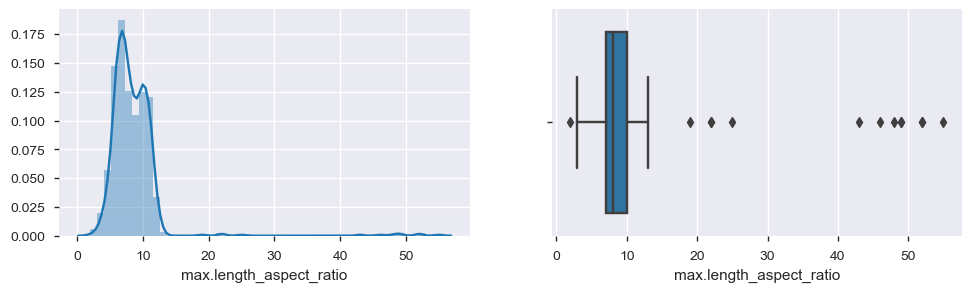


Number of missing values in max.length_aspect_ratio :  0


In [19]:
# Hist and Box plot for column max.length_aspect_ratio

plt.figure(figsize = (18,10))
plt.subplot(3,3,1)
sns.distplot(df2_m["max.length_aspect_ratio"])
plt.xlabel("max.length_aspect_ratio")

plt.subplot(3,3,2)
sns.boxplot(df2_m["max.length_aspect_ratio"])
plt.xlabel("max.length_aspect_ratio")
plt.show()

print('\nNumber of missing values in max.length_aspect_ratio : ', df1['max.length_aspect_ratio'].isna().sum())

**Observations -**

    * Data in max.length_aspect_ratio has positive skewness due to outliers.
    * Outliers present in max.length_aspect_ratio.
    * Number of missing values in radius_ratio is 0.

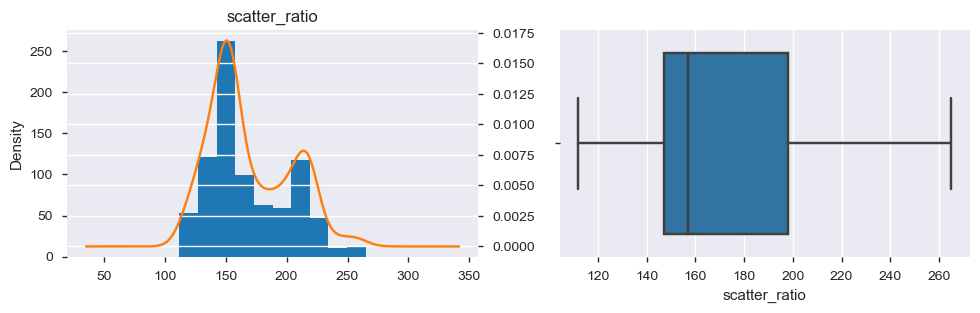


Number of missing values in scatter_ratio :  1


In [20]:
# Hist and Box plot for column scatter_ratio

plt.figure(figsize = (18,10))
plt.subplot(3,3,1)
#sns.distplot wont work for columns with float datatype.Conversion of column to integer datatype is not possible since the
# column is having missing values. Hence applied histogram in the background and kde on secondary_y axis. 
ax1 = df2_m["scatter_ratio"].plot(kind='hist')
df2_m["scatter_ratio"].plot(kind='kde', ax=ax1, secondary_y=True, title="scatter_ratio")

plt.subplot(3,3,2)
sns.boxplot(df2_m["scatter_ratio"])
plt.xlabel("scatter_ratio")
plt.show()

print('\nNumber of missing values in scatter_ratio : ', df1['scatter_ratio'].isna().sum())

**Observations -**

    * Data in scatter_ratio looks bimodal(two peaks).
    * No Outliers in scatter_ratio.
    * Number of missing values in radius_ratio is 1.

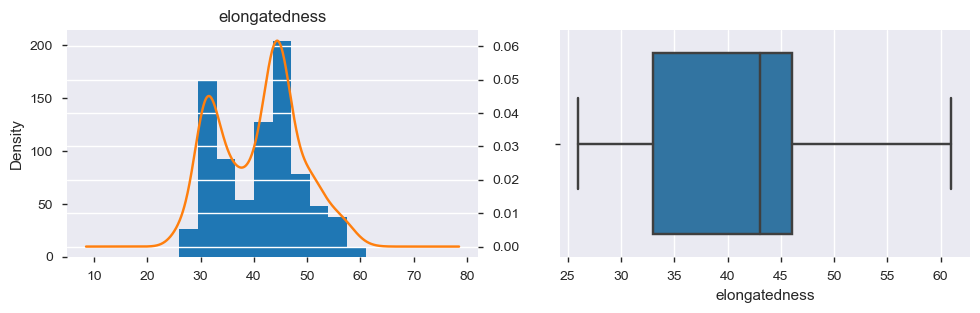


Number of missing values in elongatedness :  1


In [21]:
# Hist and Box plot for column elongatedness

plt.figure(figsize = (18,10))
plt.subplot(3,3,1)
#sns.distplot wont work for columns with float datatype.Conversion of column to integer datatype is not possible since the
# column is having missing values. Hence applied histogram in the background and kde on secondary_y axis. 
ax1 = df2_m["elongatedness"].plot(kind='hist')
df2_m["elongatedness"].plot(kind='kde', ax=ax1, secondary_y=True, title="elongatedness")

plt.subplot(3,3,2)
sns.boxplot(df2_m["elongatedness"])
plt.xlabel("elongatedness")
plt.show()

print('\nNumber of missing values in elongatedness : ', df1['elongatedness'].isna().sum())

**Observations -**

    * Data in elongatedness looks bimodal(two peaks).
    * No Outliers in elongatedness.
    * Number of missing values in elongatedness is 1.

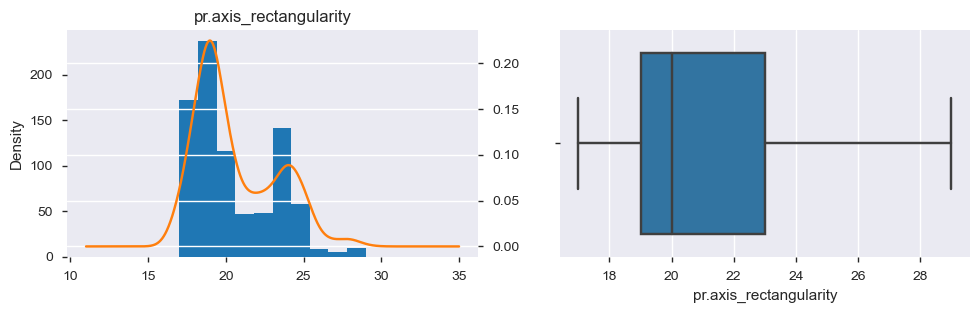


Number of missing values in pr.axis_rectangularity :  3


In [22]:
# Hist and Box plot for column pr.axis_rectangularity

plt.figure(figsize = (18,10))
plt.subplot(3,3,1)
#sns.distplot wont work for columns with float datatype.Conversion of column to integer datatype is not possible since the
# column is having missing values. Hence applied histogram in the background and kde on secondary_y axis. 
ax1 = df2_m["pr.axis_rectangularity"].plot(kind='hist')
df2_m["pr.axis_rectangularity"].plot(kind='kde', ax=ax1, secondary_y=True, title="pr.axis_rectangularity")

plt.subplot(3,3,2)
sns.boxplot(df2_m["pr.axis_rectangularity"])
plt.xlabel("pr.axis_rectangularity")
plt.show()

print('\nNumber of missing values in pr.axis_rectangularity : ', df1['pr.axis_rectangularity'].isna().sum())

**Observations -**

    * Data in pr.axis_rectangularity looks bimodal(two peaks).
    * No Outliers in pr.axis_rectangularity.
    * Number of missing values in pr.axis_rectangularity is 3.

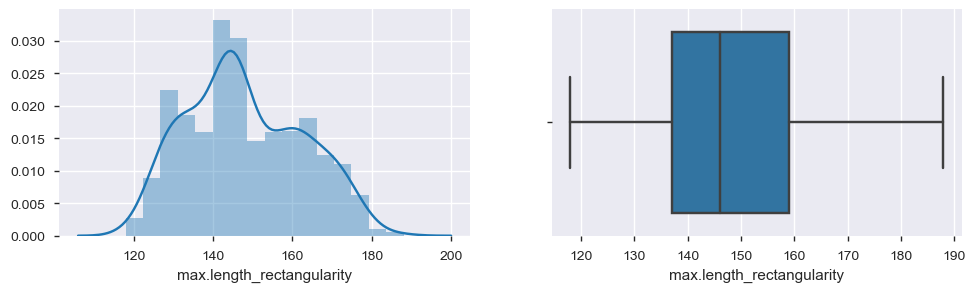


Number of missing values in max.length_rectangularity :  0


In [23]:
# Hist and Box plot for column max.length_rectangularity

plt.figure(figsize = (18,10))
plt.subplot(3,3,1)
sns.distplot(df2_m["max.length_rectangularity"])
plt.xlabel("max.length_rectangularity")

plt.subplot(3,3,2)
sns.boxplot(df2_m["max.length_rectangularity"])
plt.xlabel("max.length_rectangularity")
plt.show()

print('\nNumber of missing values in max.length_rectangularity : ', df1['max.length_rectangularity'].isna().sum())

**Observations -**

    * Data in max.length_rectangularity looks normally distributed and multimodal(more than two peaks).
    * No Outliers in max.length_rectangularity.
    * Number of missing values in max.length_rectangularity is 0.

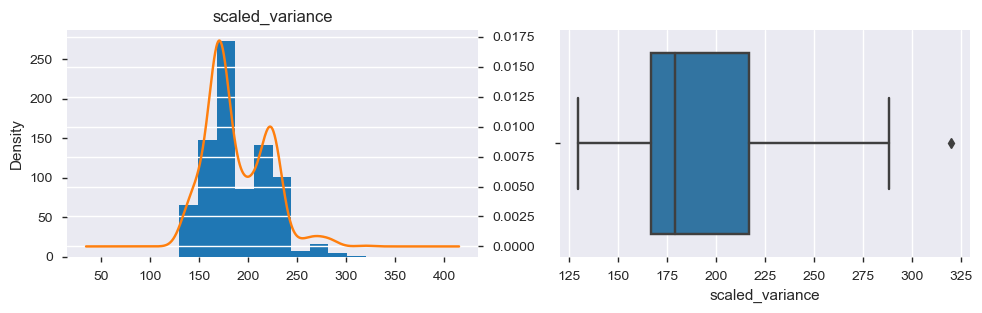


Number of missing values in scaled_variance :  3


In [24]:
# Hist and Box plot for column scaled_variance

plt.figure(figsize = (18,10))
plt.subplot(3,3,1)
#sns.distplot wont work for columns with float datatype.Conversion of column to integer datatype is not possible since the
# column is having missing values. Hence applied histogram in the background and kde on secondary_y axis. 
ax1 = df2_m["scaled_variance"].plot(kind='hist')
df2_m["scaled_variance"].plot(kind='kde', ax=ax1, secondary_y=True, title="scaled_variance")

plt.subplot(3,3,2)
sns.boxplot(df2_m["scaled_variance"])
plt.xlabel("scaled_variance")
plt.show()

print('\nNumber of missing values in scaled_variance : ', df1['scaled_variance'].isna().sum())

**Observations -**

    * Data in scaled_variance looks bimodal(two peaks).
    * Few Outliers in scaled_variance.
    * Number of missing values in scaled_variance is 3.

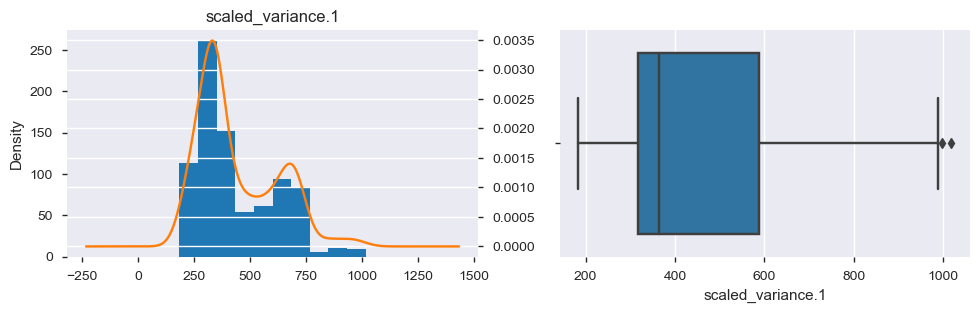


Number of missing values in scaled_variance.1 :  2


In [25]:
# Hist and Box plot for column scaled_variance.1

plt.figure(figsize = (18,10))
plt.subplot(3,3,1)
#sns.distplot wont work for columns with float datatype.Conversion of column to integer datatype is not possible since the
# column is having missing values. Hence applied histogram in the background and kde on secondary_y axis. 
ax1 = df2_m["scaled_variance.1"].plot(kind='hist')
df2_m["scaled_variance.1"].plot(kind='kde', ax=ax1, secondary_y=True, title="scaled_variance.1")

plt.subplot(3,3,2)
sns.boxplot(df2_m["scaled_variance.1"])
plt.xlabel("scaled_variance.1")
plt.show()

print('\nNumber of missing values in scaled_variance.1 : ', df1['scaled_variance.1'].isna().sum())

**Observations -**

    * Data in scaled_variance.1 looks bimodal(two peaks).
    * Few Outliers in scaled_variance.1.
    * Number of missing values in scaled_variance.1 is 2.

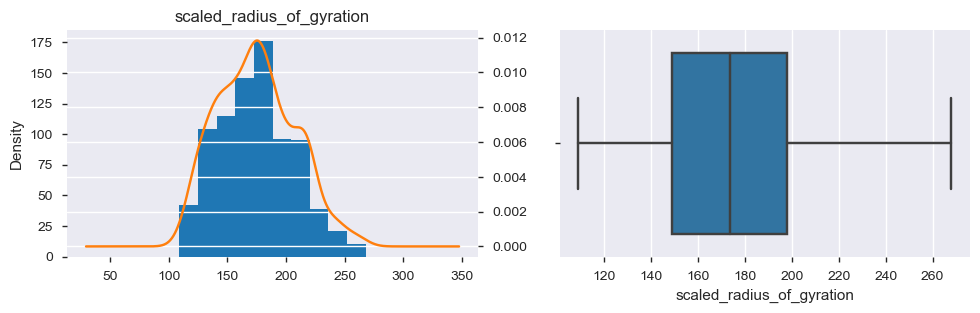


Number of missing values in scaled_radius_of_gyration :  2


In [26]:
# Hist and Box plot for column scaled_radius_of_gyration

plt.figure(figsize = (18,10))
plt.subplot(3,3,1)
#sns.distplot wont work for columns with float datatype.Conversion of column to integer datatype is not possible since the
# column is having missing values. Hence applied histogram in the background and kde on secondary_y axis. 
ax1 = df2_m["scaled_radius_of_gyration"].plot(kind='hist')
df2_m["scaled_radius_of_gyration"].plot(kind='kde', ax=ax1, secondary_y=True, title="scaled_radius_of_gyration")

plt.subplot(3,3,2)
sns.boxplot(df2_m["scaled_radius_of_gyration"])
plt.xlabel("scaled_radius_of_gyration")
plt.show()

print('\nNumber of missing values in scaled_radius_of_gyration : ', df1['scaled_radius_of_gyration'].isna().sum())

**Observations -**

    * Data in scaled_radius_of_gyration looks normally distributed.
    * No Outliers in scaled_radius_of_gyration.
    * Number of missing values in scaled_radius_of_gyration is 2.

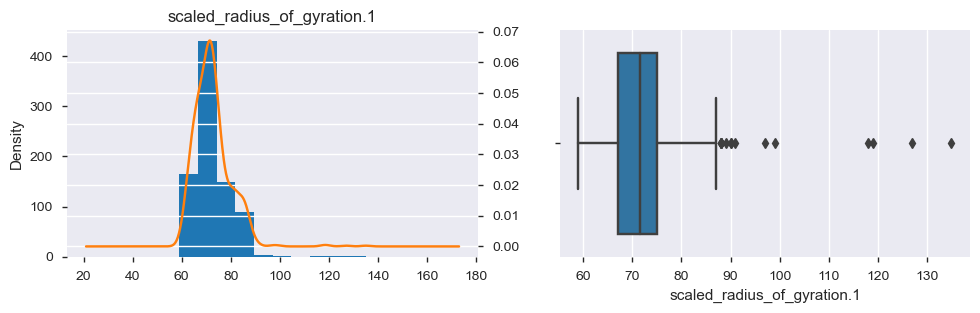


Number of missing values in scaled_radius_of_gyration.1 :  4


In [27]:
# Hist and Box plot for column scaled_radius_of_gyration.1

plt.figure(figsize = (18,10))
plt.subplot(3,3,1)
#sns.distplot wont work for columns with float datatype.Conversion of column to integer datatype is not possible since the
# column is having missing values. Hence applied histogram in the background and kde on secondary_y axis. 
ax1 = df2_m["scaled_radius_of_gyration.1"].plot(kind='hist')
df2_m["scaled_radius_of_gyration.1"].plot(kind='kde', ax=ax1, secondary_y=True, title="scaled_radius_of_gyration.1")

plt.subplot(3,3,2)
sns.boxplot(df2_m["scaled_radius_of_gyration.1"])
plt.xlabel("scaled_radius_of_gyration.1")
plt.show()

print('\nNumber of missing values in scaled_radius_of_gyration.1 : ', df1['scaled_radius_of_gyration.1'].isna().sum())

**Observations -**

    * Data in scaled_radius_of_gyration.1 looks normally distributed and has positive skewness.
    * Many Outliers in scaled_radius_of_gyration.1.
    * Number of missing values in scaled_radius_of_gyration.1 is 4.

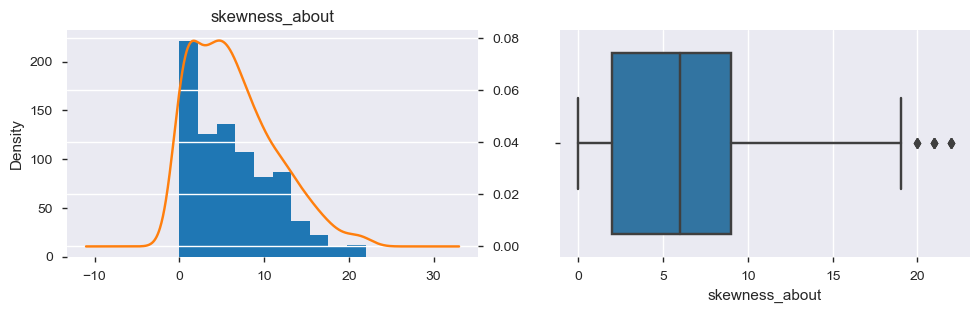


Number of missing values in skewness_about :  6


In [28]:
# Hist and Box plot for column skewness_about

plt.figure(figsize = (18,10))
plt.subplot(3,3,1)
#sns.distplot wont work for columns with float datatype.Conversion of column to integer datatype is not possible since the
# column is having missing values. Hence applied histogram in the background and kde on secondary_y axis. 
ax1 = df2_m["skewness_about"].plot(kind='hist')
df2_m["skewness_about"].plot(kind='kde', ax=ax1, secondary_y=True, title="skewness_about")

plt.subplot(3,3,2)
sns.boxplot(df2_m["skewness_about"])
plt.xlabel("skewness_about")
plt.show()

print('\nNumber of missing values in skewness_about : ', df1['skewness_about'].isna().sum())

**Observations -**

    * Data in skewness_about looks right skewned distribution.
    * Few Outliers in skewness_about.
    * Number of missing values in skewness_about is 6.

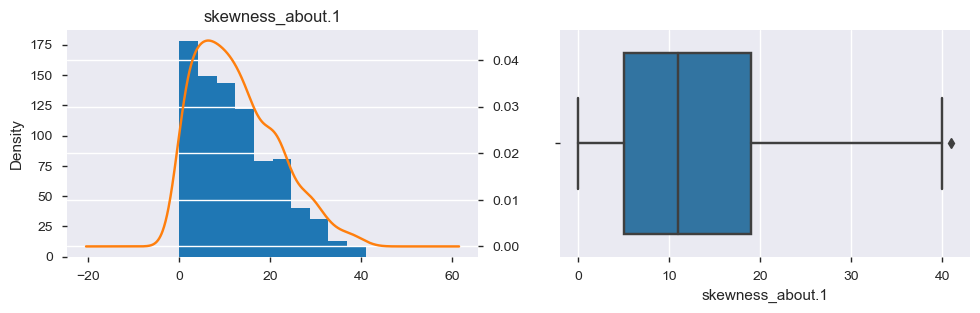


Number of missing values in skewness_about.1 :  1


In [29]:
# Hist and Box plot for column skewness_about.1

plt.figure(figsize = (18,10))
plt.subplot(3,3,1)
#sns.distplot wont work for columns with float datatype.Conversion of column to integer datatype is not possible since the
# column is having missing values. Hence applied histogram in the background and kde on secondary_y axis. 
ax1 = df2_m["skewness_about.1"].plot(kind='hist')
df2_m["skewness_about.1"].plot(kind='kde', ax=ax1, secondary_y=True, title="skewness_about.1")

plt.subplot(3,3,2)
sns.boxplot(df2_m["skewness_about.1"])
plt.xlabel("skewness_about.1")
plt.show()

print('\nNumber of missing values in skewness_about.1 : ', df1['skewness_about.1'].isna().sum())

**Observations -**

    * Data in skewness_about.1 looks right skewned distribution.
    * Few Outliers in skewness_about.1.
    * Number of missing values in skewness_about.1 is 1.

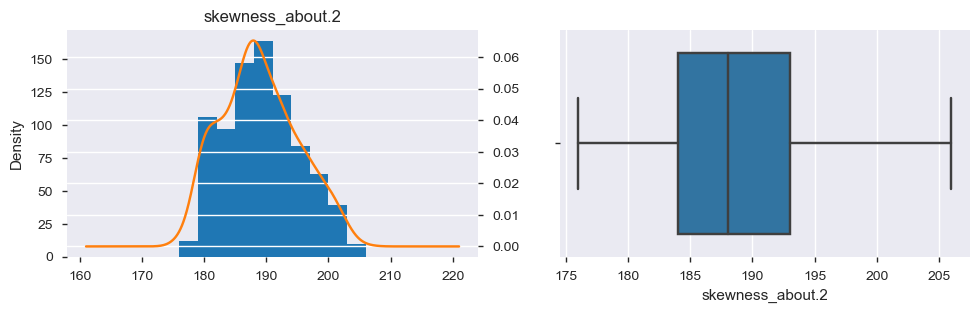


Number of missing values in skewness_about.2 :  1


In [30]:
# Hist and Box plot for column skewness_about.2

plt.figure(figsize = (18,10))
plt.subplot(3,3,1)
#sns.distplot wont work for columns with float datatype.Conversion of column to integer datatype is not possible since the
# column is having missing values. Hence applied histogram in the background and kde on secondary_y axis. 
ax1 = df2_m["skewness_about.2"].plot(kind='hist')
df2_m["skewness_about.2"].plot(kind='kde', ax=ax1, secondary_y=True, title="skewness_about.2")

plt.subplot(3,3,2)
sns.boxplot(df2_m["skewness_about.2"])
plt.xlabel("skewness_about.2")
plt.show()

print('\nNumber of missing values in skewness_about.2 : ', df1['skewness_about.2'].isna().sum())

**Observations -**

    * Data in skewness_about.2 looks normally distributed.
    * No Outliers in skewness_about.2.
    * Number of missing values in skewness_about.2 is 1.

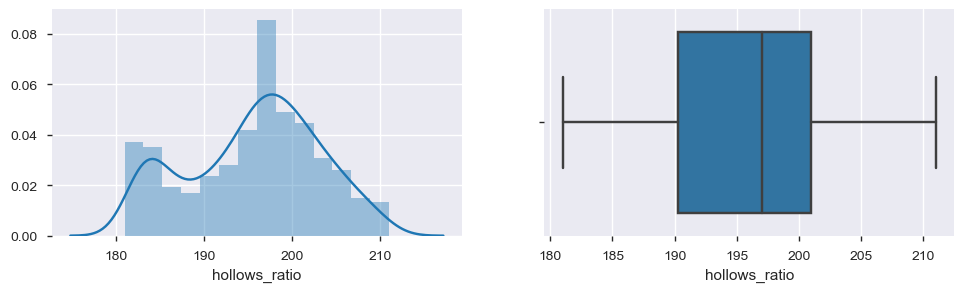


Number of missing values in hollows_ratio :  0


In [31]:
# Hist and Box plot for column hollows_ratio

plt.figure(figsize = (18,10))
plt.subplot(3,3,1)
sns.distplot(df2_m["hollows_ratio"])
plt.xlabel("hollows_ratio")

plt.subplot(3,3,2)
sns.boxplot(df2_m["hollows_ratio"])
plt.xlabel("hollows_ratio")
plt.show()

print('\nNumber of missing values in hollows_ratio : ', df1['hollows_ratio'].isna().sum())

**Observations -**

    * Data in hollows_ratio looks bimodal(two peaks).
    * No Outliers in hollows_ratio.
    * Number of missing values in hollows_ratio is 0.

In [32]:
# Target feature analysis

print("Dependent feature(class) distribution \n\n", df1["class"].value_counts())
print("\nDependent feature(class) % distribution \n\n", df1["class"].value_counts(normalize=True))

Dependent feature(class) distribution 

 car    429
bus    218
van    199
Name: class, dtype: int64

Dependent feature(class) % distribution 

 car    0.507092
bus    0.257683
van    0.235225
Name: class, dtype: float64


Text(0.5, 0, 'Class')

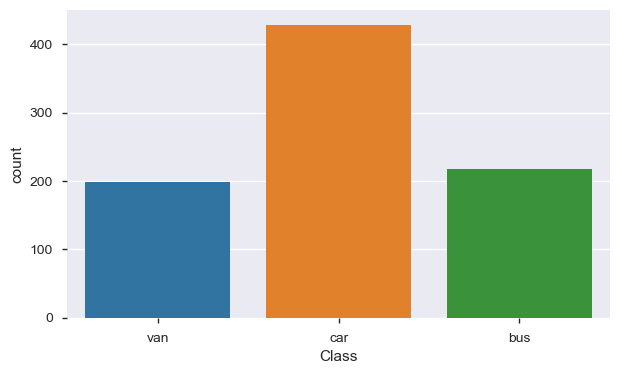

In [33]:
plt.figure(figsize=(7,4))
sns.countplot(df1["class"])
plt.xlabel("Class")

**Target feature(Class) distribution is fine. Significant number of rows present for eact type of the class.**

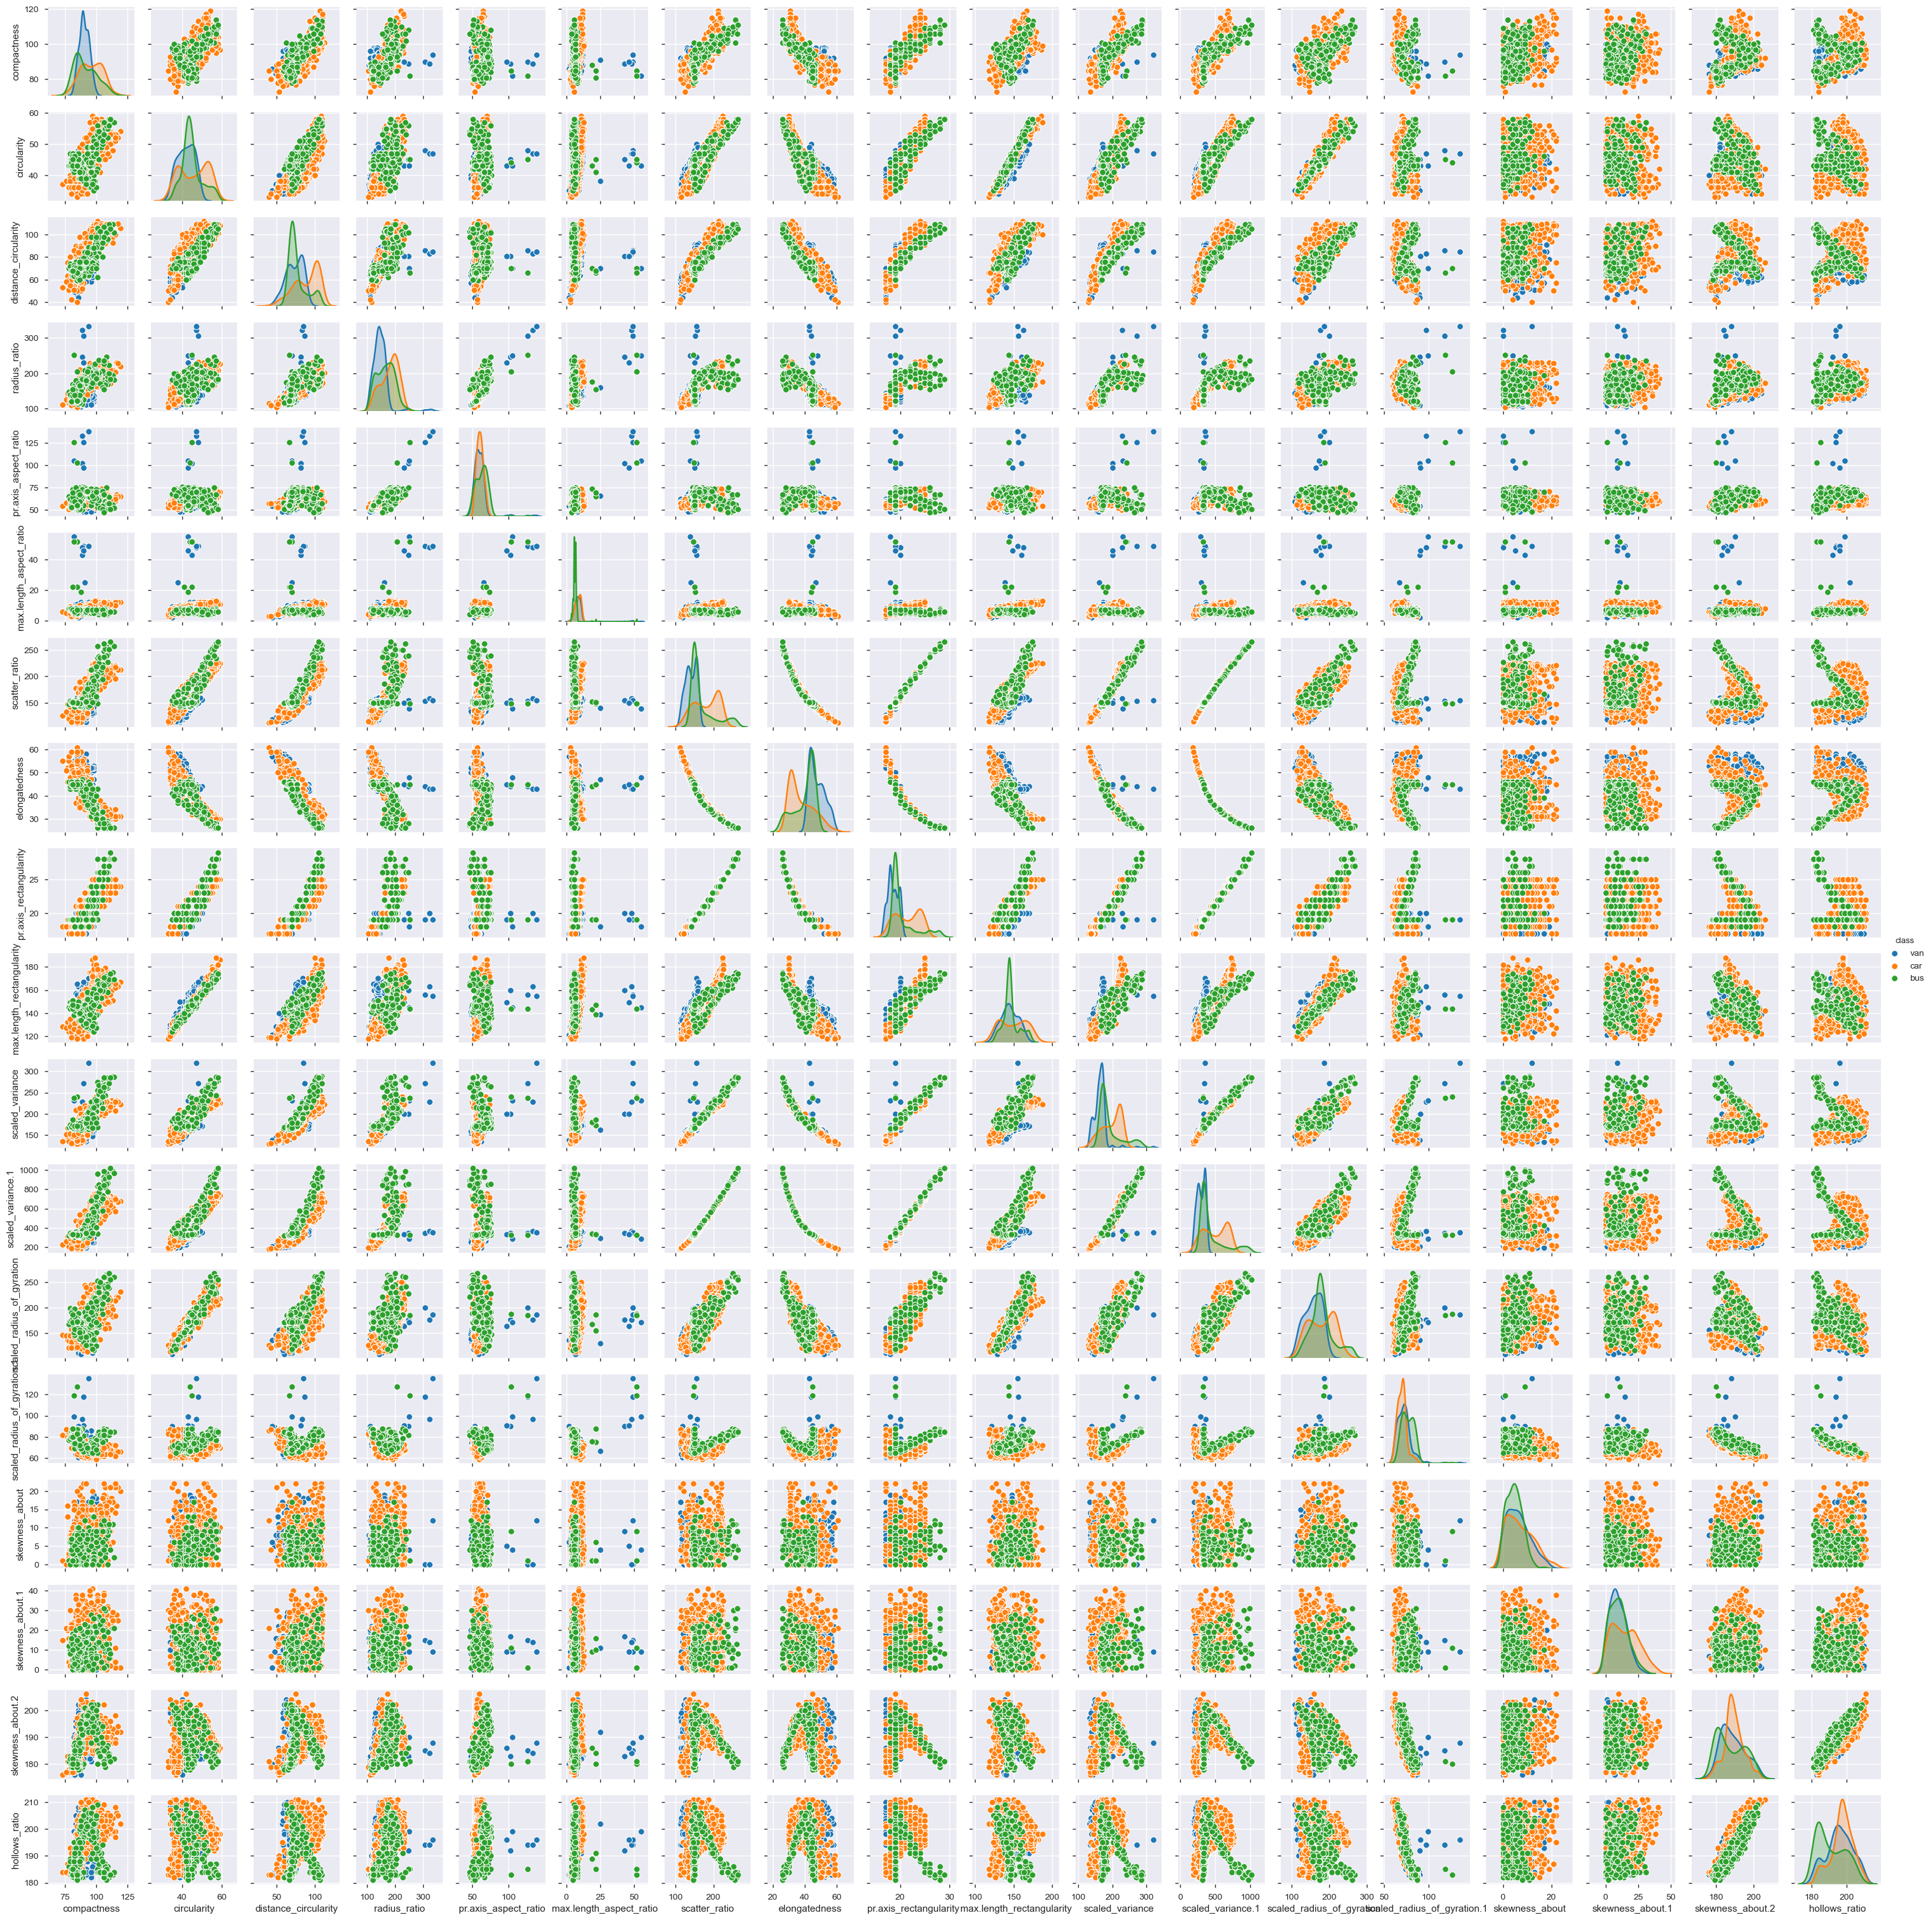

In [34]:
#### Pair Plot to identify distribution, relationship etc

pp = sns.pairplot(df1, hue='class', diag_kind='kde')
pp.fig.set_size_inches(30,30)

**Observations -**

    1. Plots in the diagonal line shows that equal distribution of class(car, van, bus) present in all the columns. 
    2. Following Linear relationships are identified from pair plot -
       * compactness and circularity have positive linear relationship
       * compactness and distance_circularity have positive linear relationship
       * distance_circularity and circularity have positive linear relationship
       * radius_ratio and compactness have positive linear relationship. radius_ratio and compactness scatter plot (present within the pairplot) shows 6 Outliers in the radius_ratio are located futher away from the bunch of data items.  
       * radius_ratio and circularity have positive linear relationship. radius_ratio and circularity scatter plot (present within the pairplot) shows 6 Outliers in the radius_ratio are located futher away from the bunch of data items.  
       * radius_ratio and distance_circularity have positive linear relationship. radius_ratio and distance_circularity scatter plot (present within the pairplot) shows 6 Outliers in the radius_ratio are located futher away from the bunch of data items.  
       * scatter_ratio has positive linear relationship with compactness, circularity and distance_circularity
       * elongatedness has negative linear relationship with compactness, circularity, distance_circularity and radius_ratio
       * pr.axis_rectangularity has positive linear relationship with compactness, circularity and distance_circularity
       * max.length_rectangularity has positive linear relationship with compactness, circularity, distance_circularity, scatter_ratio and pr.axis_rectangularity
       * max.length_rectangularity has negative linear relationship with elongatedness
       * scaled_variance has positive linear relationship with compactness, circularity, distance_circularity,  scatter_ratio, pr.axis_rectangularity and max.length_rectangularity
       * scaled_variance has negative linear relationship with elongatedness
       * scaled_variance.1 has positive linear relationship with compactness, circularity, distance_circularity,  scatter_ratio, pr.axis_rectangularity, max.length_rectangularity and scaled_variance
       * scaled_variance.1 has negative linear relationship with elongatedness
       * scaled_radius_of_gyration has positive linear relationship with compactness, circularity, distance_circularity, scatter_ratio, pr.axis_rectangularity, max.length_rectangularity, scaled_variance and scaled_variance.1
       * scaled_radius_of_gyration has negative linear relationship with elongatedness
       * skewness_about.2 has positive linear relationship with hollows_ratio
       * skewness_about.2 has negative linear relationship with scaled_radius_of_gyration.1 
       * hollows_ratio has negative linear relationship with scaled_radius_of_gyration.1 

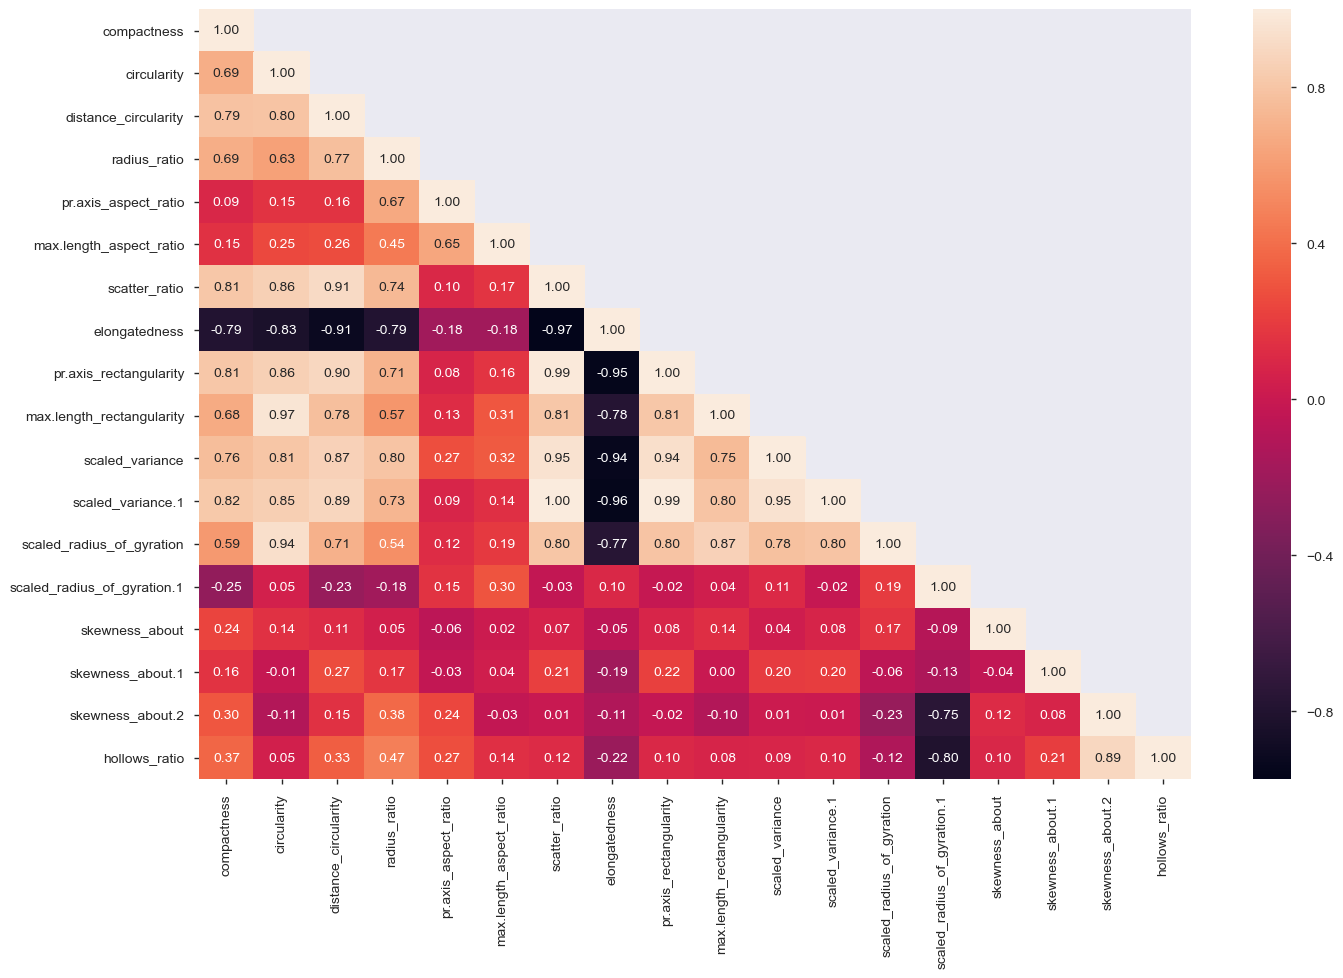

In [35]:
# Correlation matrix

corr1 = df1.corr()
mask1=np.zeros_like(corr1);
mask1[np.triu_indices_from(mask1, 1)] = True

plt.figure(figsize=(16,10))
sns.heatmap(corr1,annot=True, fmt = '.2f', mask=mask1)

**Observations -**

**Correlation matrix shows there are many features with correlation > 0.75 and < -0.75, however I am considering the cutoff value > 0.90 and < -0.90 as very high correlation and those features would be dropped.**

**There are very high correlations between some of the features -** 

* scatter_ratio and distance_circularity have high positive correlation of 0.91
* scatter_ratio and pr.axis_rectangularity have high positive correlation of 0.99
* scatter_ratio and scaled_variance have high positive correlation of 0.95 
* scatter_ratio and scaled_variance.1 have high positive correlation of 1.0
* elongatedness and distance_circularity have high negative correlation of -0.91
* elongatedness and scatter_ratio have high negative correlation of -0.97
* elongatedness and pr.axis_rectangularity have high negative correlation of -0.95
* elongatedness and scaled_variance have high negative correlation of -0.94
* elongatedness and scaled_variance.1 have high negative correlation of -0.96
* pr.axis_rectangularity and distance_circularity have high positive correlation of 0.90
* pr.axis_rectangularity and scaled_variance have high positive correlation of 0.94
* pr.axis_rectangularity and scaled_variance.1 have high positive correlation of 0.99
* scaled_variance and scaled_variance.1 have high positive correlation of 0.95
* circularity and max.length_rectangularity have high positive correlation of 0.97
* circularity and scaled_radius_of_gyration have high positive correlation of 0.94

**scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance.1 and circularity are the common features which are having very high correlation with other features. Dropping these features will eliminate high correlation between independent features. These features will be dropped in next step(Data Processing).**

## Data Preprocessing

#### Label encoder -> Convert the categorical to numerical values in class feature

In [36]:
lbl = LabelEncoder()
df2_m["class"]  = lbl.fit_transform(df2_m["class"])
df1["class"]  = lbl.fit_transform(df1["class"])

In [37]:
df2_m["class"].value_counts()

1    429
0    218
2    199
Name: class, dtype: int64

* Values got converted -

        car -> 1
        bus -> 0 
        van -> 2

#### Handling Missing values

In [38]:
# loop to check missing values in each column. If missing values are present in a column, its replaced with median

for colsa in df2_m.columns:
    TMPA = df2_m[colsa].isna().sum()
    print("\nMissing values in {} : {}".format(colsa, TMPA))      
    if TMPA > 0:
        df2_m[colsa].fillna(df2_m[colsa].median(),inplace=True) # missing values are replaced with median
        print("After handling Missing values in {} : {}".format(colsa, 
                                                              df2_m[colsa].isna().sum()))


Missing values in compactness : 0

Missing values in circularity : 5
After handling Missing values in circularity : 0

Missing values in distance_circularity : 4
After handling Missing values in distance_circularity : 0

Missing values in radius_ratio : 6
After handling Missing values in radius_ratio : 0

Missing values in pr.axis_aspect_ratio : 2
After handling Missing values in pr.axis_aspect_ratio : 0

Missing values in max.length_aspect_ratio : 0

Missing values in scatter_ratio : 1
After handling Missing values in scatter_ratio : 0

Missing values in elongatedness : 1
After handling Missing values in elongatedness : 0

Missing values in pr.axis_rectangularity : 3
After handling Missing values in pr.axis_rectangularity : 0

Missing values in max.length_rectangularity : 0

Missing values in scaled_variance : 3
After handling Missing values in scaled_variance : 0

Missing values in scaled_variance.1 : 2
After handling Missing values in scaled_variance.1 : 0

Missing values in scaled

In [39]:
df2_m.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

* All the missing values are handled

#### Handling Outliers

In [40]:
df2_m.rename(columns={"pr.axis_aspect_ratio": "pr_axis_aspect_ratio", 
                      "max.length_aspect_ratio": "max_length_aspect_ratio",
                      "pr.axis_rectangularity": "pr_axis_rectangularity",
                     "max.length_rectangularity": "max_length_rectangularity"},inplace=True)

In [41]:
# loop to check outliers in each column. If outliers are present in a column, its replaced with upper/lower whisker

TMP1 = pd.DataFrame()
for cols in df2_m.columns:
    Q1 = df2_m[cols].quantile(0.25) #first quantile
    Q3 = df2_m[cols].quantile(0.75) #third quantile
    IQR = Q3 - Q1 
    TMP1 = []
    TMP1 = df2_m[cols][(df2_m[cols] < (Q1 - 1.5 * IQR)) | (df2_m[cols] > (Q3 + 1.5 * IQR))]
    print("\nOutliers in {} : \n{}".format(cols, TMP1))      
    if TMP1.count() > 0:
        UP = Q3 + 1.5 * IQR    # calculate upper whisker
        LP = Q1 - 1.5 * IQR    # calculate lower whisker
        df2_m[cols] = np.where(df2_m[cols] > UP, UP, df2_m[cols]) # replace higher-end outliers with upper whisker
        df2_m[cols] = np.where(df2_m[cols] < LP, LP, df2_m[cols]) # replace lower-end outliers with lower whisker
        print("\nAfter handling Outliers in {} : \n{}".format(cols, 
                                                              df2_m[cols][(df2_m[cols] < (Q1 - 1.5 * IQR)) | (df2_m[cols] > (Q3 + 1.5 * IQR))]))


Outliers in compactness : 
Series([], Name: compactness, dtype: int64)

Outliers in circularity : 
Series([], Name: circularity, dtype: float64)

Outliers in distance_circularity : 
Series([], Name: distance_circularity, dtype: float64)

Outliers in radius_ratio : 
37     306.0
135    322.0
388    333.0
Name: radius_ratio, dtype: float64

After handling Outliers in radius_ratio : 
Series([], Name: radius_ratio, dtype: float64)

Outliers in pr_axis_aspect_ratio : 
4      103.0
37     126.0
100    126.0
135    133.0
291    102.0
388    138.0
523     97.0
706    105.0
Name: pr_axis_aspect_ratio, dtype: float64

After handling Outliers in pr_axis_aspect_ratio : 
Series([], Name: pr_axis_aspect_ratio, dtype: float64)

Outliers in max_length_aspect_ratio : 
4      52
37     49
100    52
127    22
135    48
291    43
388    49
391    25
523    46
544    19
655     2
706    55
815    22
Name: max_length_aspect_ratio, dtype: int64

After handling Outliers in max_length_aspect_ratio : 
Series([

**All the outliers are replaced with lower/upper whisker**

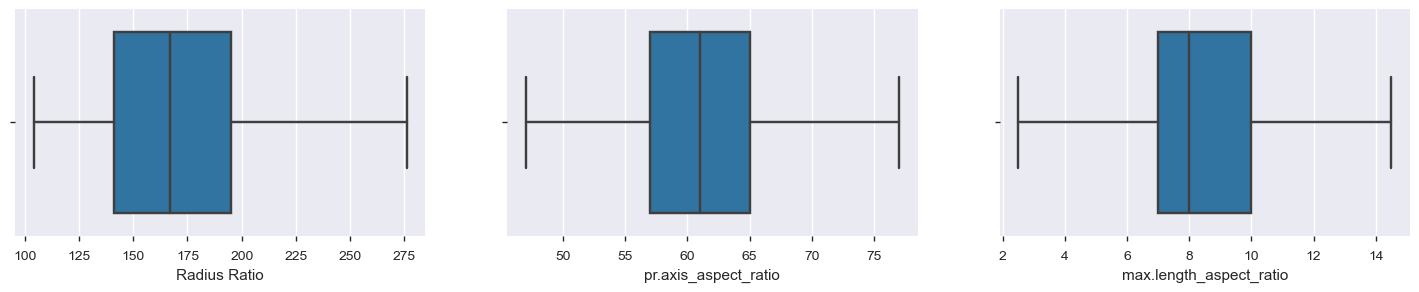

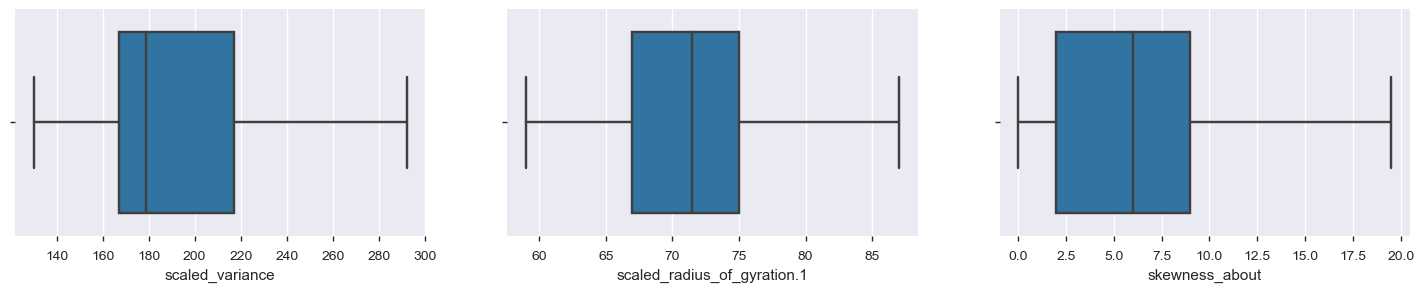

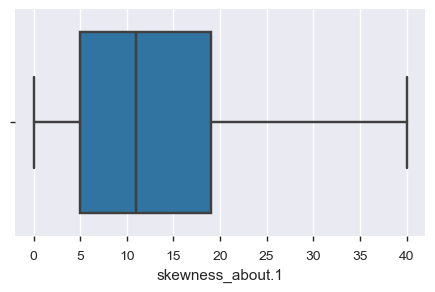

In [42]:
# plots to check whether outliers are still present

plt.figure(figsize = (18,10))
plt.subplot(3,3,1)
sns.boxplot(df2_m.radius_ratio)
plt.xlabel("Radius Ratio")

plt.subplot(3,3,2)
sns.boxplot(df2_m["pr_axis_aspect_ratio"])
plt.xlabel("pr.axis_aspect_ratio")

plt.subplot(3,3,3)
sns.boxplot(df2_m["max_length_aspect_ratio"])
plt.xlabel("max.length_aspect_ratio")
plt.show()

plt.figure(figsize = (18,10))
plt.subplot(3,3,1)
sns.boxplot(df2_m["scaled_variance"])
plt.xlabel("scaled_variance")

plt.subplot(3,3,2)
sns.boxplot(df2_m["scaled_radius_of_gyration.1"])
plt.xlabel("scaled_radius_of_gyration.1")

plt.subplot(3,3,3)
sns.boxplot(df2_m["skewness_about"])
plt.xlabel("skewness_about")
plt.show()

plt.figure(figsize = (18,10))
plt.subplot(3,3,2)
sns.boxplot(df2_m["skewness_about.1"])
plt.xlabel("skewness_about.1")
plt.show()

**Box plot shows no outliers**

#### Drop highly correlated features

In [43]:
# In next step, highly correlated features will be deleted in df2_m. A Copy has been taken in df3_p, which will be used 
#   in PCA. df3_p will have highly correlated columns. In df3_p, outliers and missing values are handled.

df3_p = df2_m.copy()

In [44]:
df2_m.drop(columns=['scatter_ratio','elongatedness','circularity','pr_axis_rectangularity','scaled_variance.1'], 
           axis=1, inplace=True)

print("After deletion : ", df2_m.shape)
print("pca df shape   : ", df3_p.shape)

After deletion :  (846, 14)
pca df shape   :  (846, 19)


* Original and PCA dataframe have 19 columns, whereas after deletion the number of columns become 14

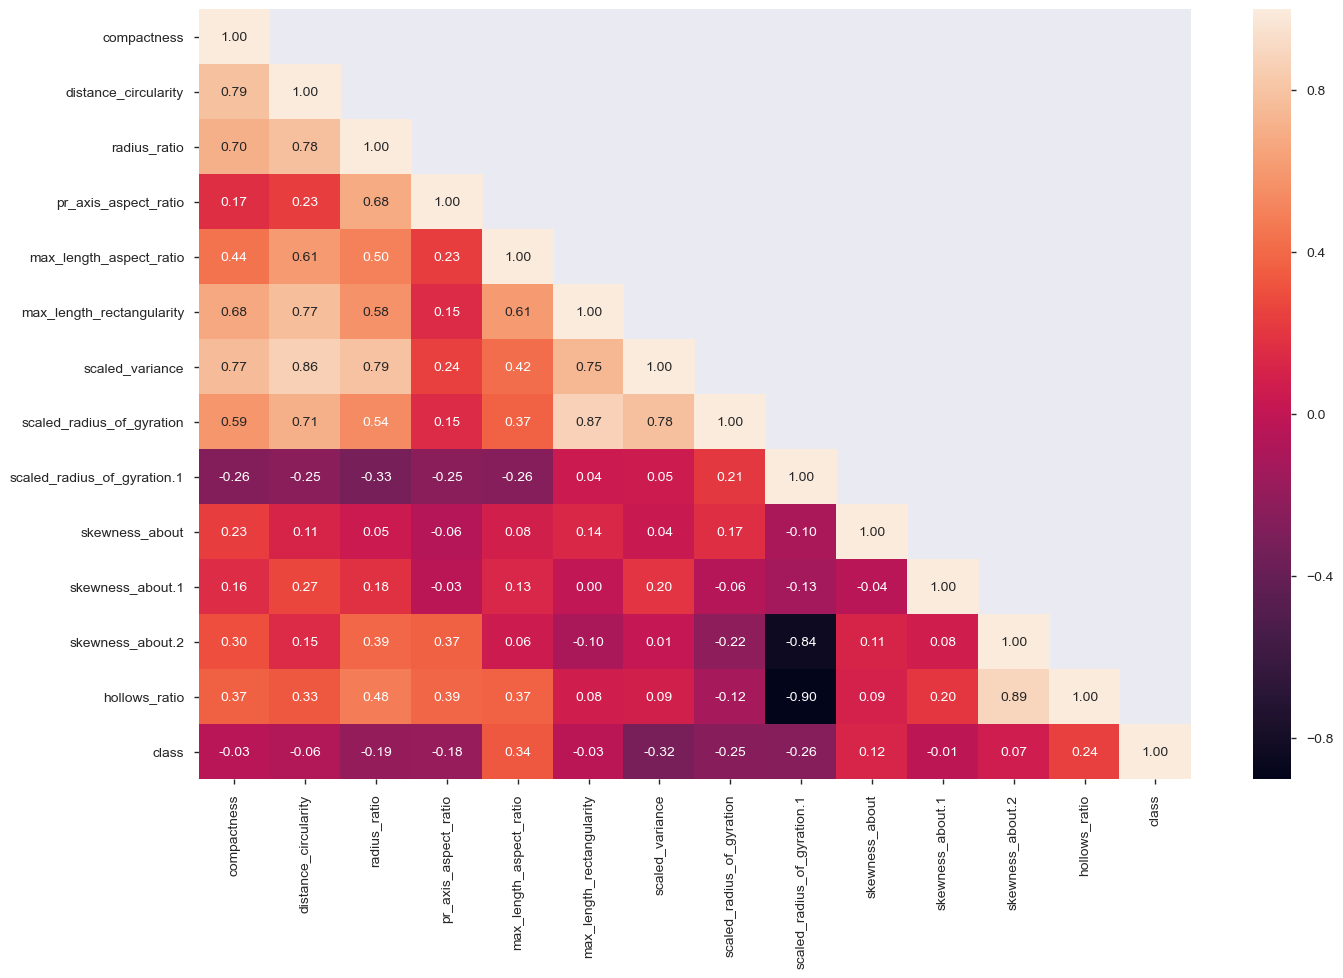

In [45]:
# Correlation matrix after removal of highly correlated features

corr1 = df2_m.corr()
mask1=np.zeros_like(corr1);
mask1[np.triu_indices_from(mask1, 1)] = True

plt.figure(figsize=(16,10))
sns.heatmap(corr1,annot=True, fmt = '.2f', mask=mask1)

**Correlation matrix shows highly correlated features (> 0.90 and < -0.90) are not present.**

## Split the data into Train and Test

#### Split the manipulated dataframe 

    In the manipulated dataframe - 
       * Outliers are replaced with Upper/Lower whisker values
       * Missing values are replaced with Median
       * Highly correlated columns are deleted

In [46]:
x_upd = df2_m.drop("class", axis = 1)  
y_upd = df2_m["class"]

xtrain1_upd, xtest1_upd, ytrain1_upd, ytest1_upd = train_test_split(x_upd, y_upd, test_size = 0.30, random_state=1)

In [47]:
print("Upd - Training set contains {0:0.1f}% of data" .format((len(xtrain1_upd)/len(df2_m))*100))
print("Upd - Test set contains {0:0.1f}% of data" .format((len(xtest1_upd)/len(df2_m))*100))

Upd - Training set contains 70.0% of data
Upd - Test set contains 30.0% of data


#### Split the dataframe created for PCA

    In the PCA dataframe - 
       * Outliers are replaced with Upper/Lower whisker values
       * Missing values are replaced with Median
       * Highly correlated columns are NOT deleted    

In [48]:
x_pca = df3_p.drop("class", axis = 1)  
y_pca = df3_p["class"]

#xtrain1_pca, xtest1_pca, ytrain1_pca, ytest1_pca = train_test_split(x_pca, y_pca, test_size = 0.30, random_state=1)

In [49]:
print("Shape of PCA X      : ", x_pca.shape)
print("Shape of Modified X : ", x_upd.shape)

Shape of PCA X      :  (846, 18)
Shape of Modified X :  (846, 13)


## Build Support Vector Machine(SVM) Model

### SVM on manipulated dataframe

In [50]:
SVM1 = svm.SVC()    
SVM1.fit(xtrain1_upd,ytrain1_upd)
SVM1_TR = SVM1.score(xtrain1_upd,ytrain1_upd)
SVM1_TS = SVM1.score(xtest1_upd,ytest1_upd)
print("Support Vector Classifier Training score : ", round(SVM1_TR * 100, 2))
print("Support Vector Classifier Test score     : ", round(SVM1_TS * 100, 2))

Support Vector Classifier Training score :  100.0
Support Vector Classifier Test score     :  52.76


In [51]:
# Scale the data

sc = StandardScaler()
xtrain_upd_sc = sc.fit_transform(xtrain1_upd)
xtest_upd_sc = sc.transform(xtest1_upd)

In [52]:
x_upd_sc = sc.transform(x_upd)

In [53]:
SVM1 = svm.SVC(probability=True)    
SVM1.fit(xtrain_upd_sc,ytrain1_upd)
SVM1_TR = SVM1.score(xtrain_upd_sc,ytrain1_upd)
SVM1_TS = SVM1.score(xtest_upd_sc,ytest1_upd)
print("Support Vector Classifier Training score : ", round(SVM1_TR * 100, 2))
print("Support Vector Classifier Test score     : ", round(SVM1_TS * 100, 2))

Support Vector Classifier Training score :  97.3
Support Vector Classifier Test score     :  93.31


**SVM on scaled data performs much better.**

In [54]:
# StratifiedKfold is used to maintain the original data ratio in each folds. 
# Below code will split the data in 20 folds, and run the model 20 times. 

#kfold = StratifiedKFold(n_splits=50)
kfold = RepeatedStratifiedKFold(n_splits=50,n_repeats=16)
cv_svm_f = cross_val_score(SVM1, x_upd_sc, y_upd, cv=kfold)
print("Cross Validation Score of SVM Model: ", round(cv_svm_f.mean() * 100,2))

Cross Validation Score of SVM Model:  95.62


**SVM model has been able to predict 95.6% with different combinations of training and test set of the dataset**

In [55]:
ytest1_upd.value_counts()

1    133
2     62
0     59
Name: class, dtype: int64

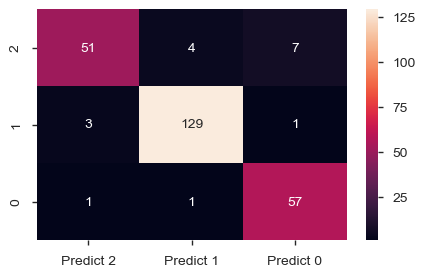

In [56]:
pred1 = SVM1.predict(xtest_upd_sc)
# Draw the confusion matrix for Logistic Regression
cm=metrics.confusion_matrix(ytest1_upd, pred1, labels=[2, 1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["2", "1","0"]],
                  columns = [i for i in ["Predict 2","Predict 1","Predict 0"]])

plt.figure(figsize = (5,3))
hm2 = sns.heatmap(df_cm, annot=True, fmt='g')
#bottom, top = hm2.get_ylim()
#hm2.set_ylim (bottom +0.5, top - 0.5)

**Analysis of Confusion Matrix -**

    * The model correctly predicted that 57, 129 and 51 vehicles belong to bus, car and van respectively.  

    * The model has incorrectly predicted 8, 5 and 4 vehicles belong to bus, car and van respectively. 

In [57]:
print("Classification Report For SVM")
print("")
CR_SVM1 = metrics.classification_report(ytest1_upd, pred1)
print(CR_SVM1)

Classification Report For SVM

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        59
           1       0.96      0.97      0.97       133
           2       0.93      0.82      0.87        62

    accuracy                           0.93       254
   macro avg       0.92      0.92      0.92       254
weighted avg       0.93      0.93      0.93       254



**Model has got very good Accuracy score, Precision, Recall and F1 score.** 

### Principal Component Analysis

In [58]:
# x_pca and y_pca are already created in split train and test data section

#x_pca = df3_p.drop("class", axis = 1)  
#y_pca = df3_p["class"]

# Scale the x_pca 
x_pca_sc = sc.fit_transform(x_pca)

In [59]:
x_pca_sc.shape

(846, 18)

In [60]:
# since there are 18 columns I am going to apply PCA on 18 columns 

pca = PCA(n_components=18)
pca.fit(x_pca_sc)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [61]:
print("Eigen vectors : \n\n", pca.components_)

Eigen vectors : 

 [[ 2.72551879e-01  2.88538242e-01  3.02629461e-01  2.67794096e-01
   9.59671499e-02  1.83748327e-01  3.11246539e-01 -3.09416323e-01
   3.08016913e-01  2.79389394e-01  3.01503271e-01  3.07493587e-01
   2.65080664e-01 -4.10598068e-02  4.12798057e-02  5.85351242e-02
   3.60220667e-02  8.24976294e-02]
 [-9.25238154e-02  1.29086711e-01 -5.14431857e-02 -1.94720199e-01
  -2.42447960e-01 -1.02486421e-01  7.18258758e-02 -9.25189066e-03
   8.41829742e-02  1.18957911e-01  7.37205566e-02  7.87954390e-02
   2.09492945e-01  5.00292034e-01 -3.93389358e-02 -9.85388499e-02
  -5.07468412e-01 -5.13655834e-01]
 [ 1.17595212e-02 -2.05364249e-01  9.16318241e-02 -2.96962770e-02
  -2.45094822e-01 -1.42454995e-01  1.20706463e-01 -8.57269269e-02
   1.24543439e-01 -2.04900804e-01  1.18879272e-01  1.23975370e-01
  -2.13189477e-01  1.90121300e-02 -3.99210690e-01  7.42715665e-01
  -4.56808061e-02 -1.52859164e-02]
 [-2.00271201e-01 -1.10912415e-02 -6.83523545e-02  2.82535767e-01
   6.10437234e-01 

**18 eigen vectors are created for 18 columns. This is sorted based on explained_variance_(eigen value) in descending order.**

In [62]:
print("Eigen values : \n\n", pca.explained_variance_)

Eigen values : 

 [9.68821710e+00 3.30348551e+00 1.19681321e+00 1.16932745e+00
 8.74901453e-01 7.43140206e-01 3.44894368e-01 2.21139161e-01
 1.34915070e-01 9.65753117e-02 6.29671897e-02 5.80644748e-02
 4.14866852e-02 3.11934986e-02 2.14924847e-02 1.96166828e-02
 1.01029302e-02 2.96899567e-03]


**For each column, an eigen value has been created. 18 Eigen values for 18 columns and displayed in descending order**

In [63]:
print(pca.explained_variance_ratio_)

[5.37598073e-01 1.83310038e-01 6.64110296e-02 6.48858482e-02
 4.85481828e-02 4.12367661e-02 1.91381495e-02 1.22709871e-02
 7.48642201e-03 5.35895314e-03 3.49404225e-03 3.22199115e-03
 2.30209148e-03 1.73092371e-03 1.19261555e-03 1.08852751e-03
 5.60610456e-04 1.64749235e-04]


**Percentage of variance or eigen value.The first value denotes approx. 53% of variance captured in first eigen vector, 18% in second vector etc.** 

In [64]:
# the "cumulative variance explained" analysis 
e_vals = pca.explained_variance_
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained : \n\n", cum_var_exp)

Cumulative Variance Explained : 

 [ 53.75980725  72.09081102  78.73191398  85.2204988   90.07531708
  94.19899369  96.11280864  97.33990735  98.08854955  98.62444487
  98.97384909  99.29604821  99.52625735  99.69934972  99.81861128
  99.92746403  99.98352508 100.        ]


**Out of 18 eigen vectors, first 7 eigen vectors itself captures 96% of variance.**

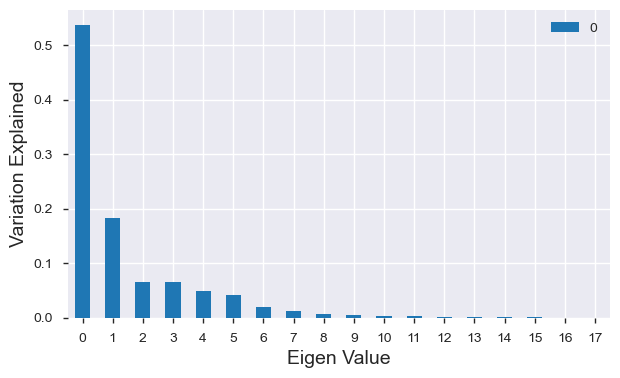

In [65]:
ax = pd.DataFrame(pca.explained_variance_ratio_).plot(kind='bar', rot=0, figsize = (7,4), fontsize = 10)
ax.set_ylabel("Variation Explained", fontsize=14)
ax.set_xlabel("Eigen Value", fontsize=14)
plt.show()

**Variation in data explained for eigen value 1 to 18. First 6 or 7 eigen value captures most of the variance.**

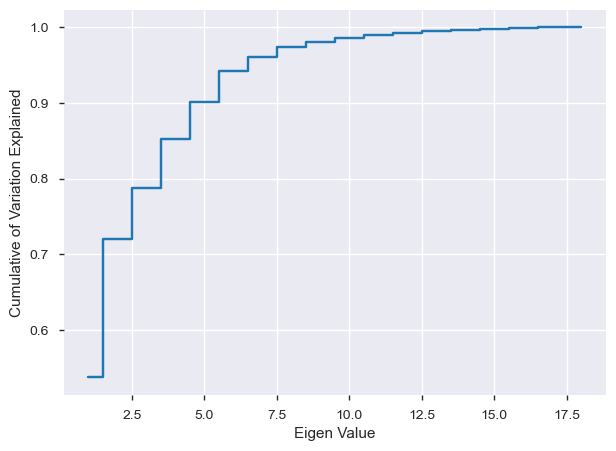

In [66]:
plt.figure(figsize=(7,5))
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cumulative of Variation Explained')
plt.xlabel('Eigen Value')
plt.show()

**Cumulative Variation in data explained for eigen value 1 to 18. Line is becoming flat from eigen value 6 or 7.**

In [67]:
# Run a loop to train & test SVM with principal components 1 to 18

for n in range(1,19):
    pca3 = PCA(n_components=n)
    pca3.fit(x_pca_sc)
    Xpca3 = pca3.transform(x_pca_sc)
    xtrain_pca, xtest_pca, ytrain_pca, ytest_pca = train_test_split(Xpca3, y_pca, test_size = 0.30, random_state=1)
    SVM2 = svm.SVC()    
    SVM2.fit(xtrain_pca, ytrain_pca)
    SVM2_TR = SVM2.score(xtrain_pca, ytrain_pca)
    SVM2_TS = SVM2.score(xtest_pca, ytest_pca)
    print("\nNumer of Principal Components : ", n)
    print("Support Vector Classifier Training score : ", round(SVM2_TR * 100, 2))
    print("Support Vector Classifier Test score     : ", round(SVM2_TS * 100, 2))


Numer of Principal Components :  1
Support Vector Classifier Training score :  62.67
Support Vector Classifier Test score     :  59.84

Numer of Principal Components :  2
Support Vector Classifier Training score :  73.48
Support Vector Classifier Test score     :  66.14

Numer of Principal Components :  3
Support Vector Classifier Training score :  77.7
Support Vector Classifier Test score     :  70.08

Numer of Principal Components :  4
Support Vector Classifier Training score :  85.64
Support Vector Classifier Test score     :  76.77

Numer of Principal Components :  5
Support Vector Classifier Training score :  94.09
Support Vector Classifier Test score     :  89.76

Numer of Principal Components :  6
Support Vector Classifier Training score :  96.96
Support Vector Classifier Test score     :  92.13

Numer of Principal Components :  7
Support Vector Classifier Training score :  96.79
Support Vector Classifier Test score     :  92.52

Numer of Principal Components :  8
Support Vecto

**There is a significant increase in test Accuracy until Principal Component 7. After 7, there is no significant difference in Accuracy score. Therefore, number of Principal Components for SVM is finalized to 7 as it captures around 95% of variance.**

### Dimensionality Reduction

In [69]:
pca3 = PCA(n_components=7) # Number of Principal components set to 7
pca3.fit(x_pca_sc)
#print(pca3.components_)
#print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(x_pca_sc)

In [70]:
Xpca3.shape

(846, 7)

* Shape denotes only 7 columns (Principal components) were present

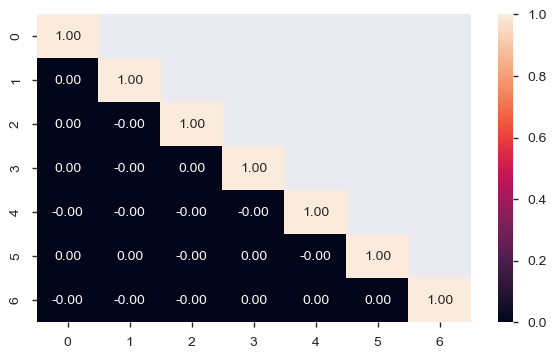

In [71]:
# Correlation matrix after removal of highly correlated features

corr1 = pd.DataFrame(Xpca3).corr()
mask1=np.zeros_like(corr1);
mask1[np.triu_indices_from(mask1, 1)] = True

plt.figure(figsize=(7,4))
sns.heatmap(corr1,annot=True, fmt = '.2f', mask=mask1)

**No correlation present between any of the Principal components**

In [72]:
T1DF = []
T1DF = pd.concat([pd.DataFrame(Xpca3),pd.DataFrame(y_pca)], axis=1)

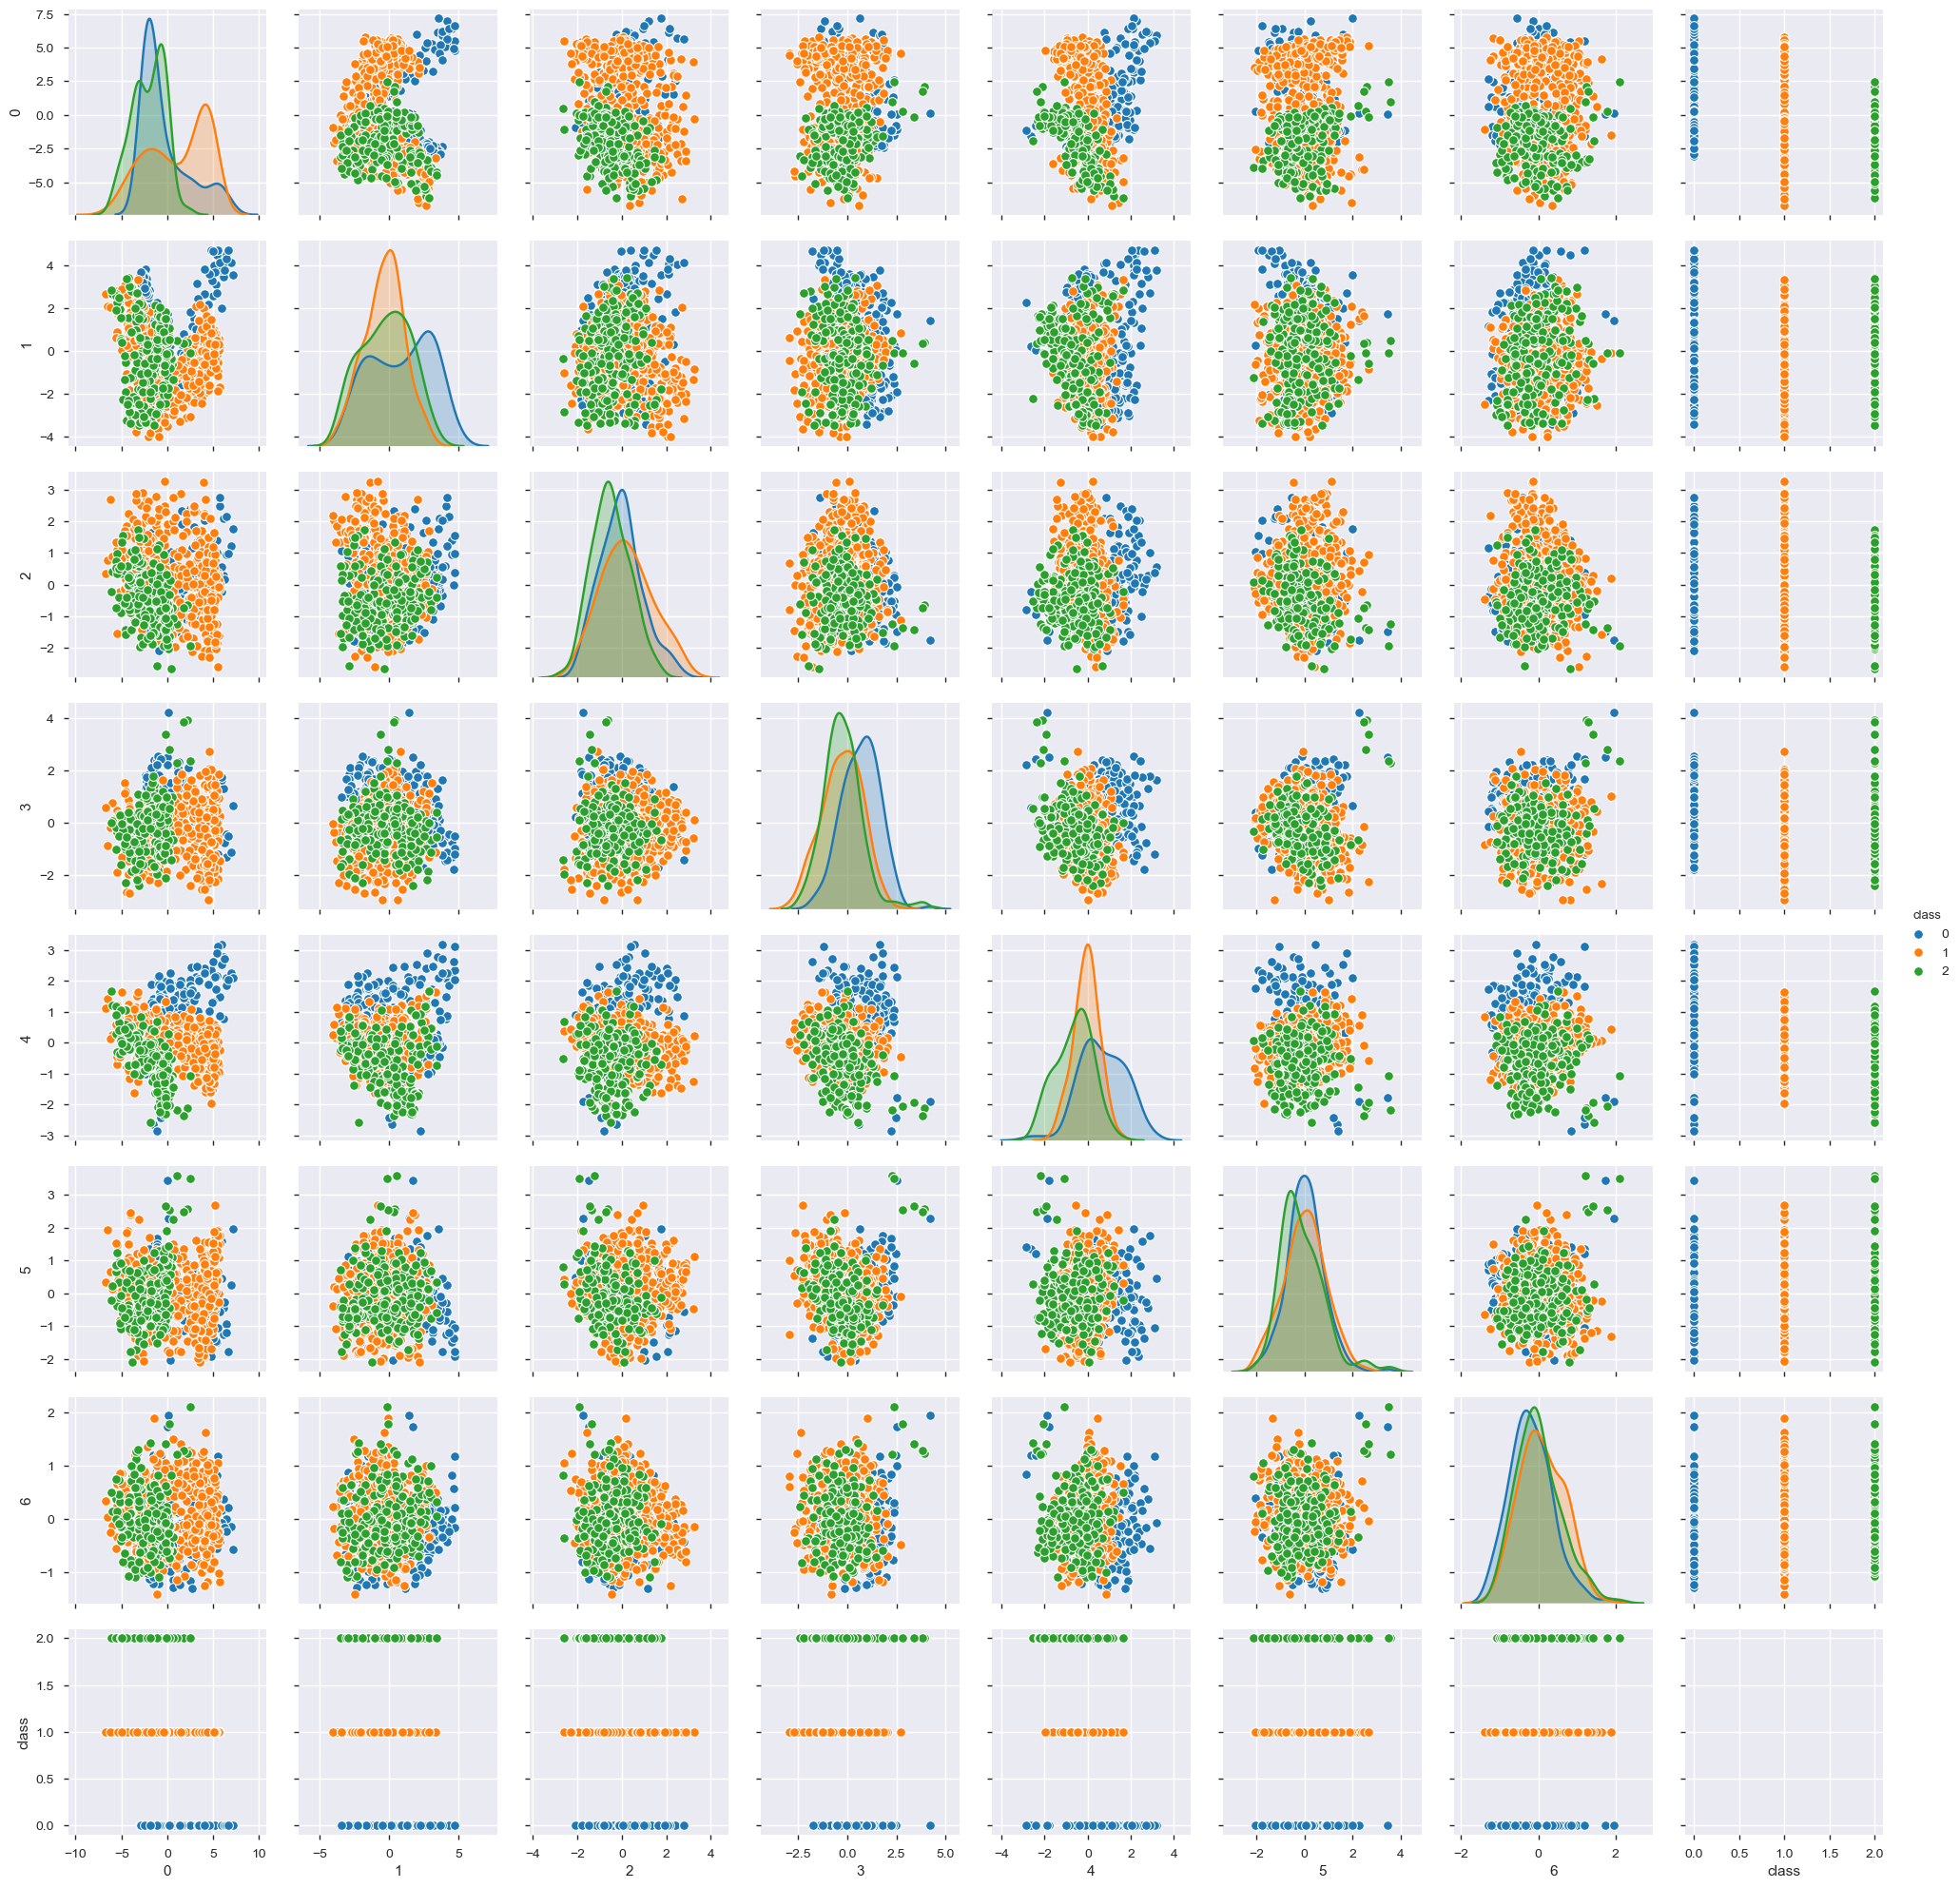

In [73]:
sns.pairplot(pd.DataFrame(T1DF), diag_kind='kde', hue='class')

**No linear relationship present between any of the Principal components**

In [74]:
#Split the PCA data into train and test.

xtrain_pca, xtest_pca, ytrain_pca, ytest_pca = train_test_split(Xpca3, y_pca, test_size = 0.30, random_state=1)

In [75]:
print("PCA - Training set contains {0:0.1f}% of data" .format((len(xtrain_pca)/len(Xpca3))*100))
print("PCA - Test set contains {0:0.1f}% of data" .format((len(xtest_pca)/len(Xpca3))*100))

PCA - Training set contains 70.0% of data
PCA - Test set contains 30.0% of data


In [76]:
SVM2 = svm.SVC(probability=True)    
SVM2.fit(xtrain_pca, ytrain_pca)
SVM2_TR = SVM2.score(xtrain_pca, ytrain_pca)
SVM2_TS = SVM2.score(xtest_pca, ytest_pca)
print("Support Vector Classifier Training score : ", round(SVM2_TR * 100, 2))
print("Support Vector Classifier Test score     : ", round(SVM2_TS * 100, 2))

Support Vector Classifier Training score :  96.79
Support Vector Classifier Test score     :  92.52


**SVM with all the columns had Accuracy score of 93.3, whereas SVM with only 7 principal components have Accuracy score of 92.5. With just 7 Principal components SVM returned almost equal Accuracy score.** 

In [77]:
# StratifiedKfold is used to maintain the original data ratio in each folds. 
# Below code will split the data in 20 folds, and run the model 20 times. 

#kfold = StratifiedKFold(n_splits=50)
kfold = RepeatedStratifiedKFold(n_splits=50,n_repeats=16)
cv_svm_pca = cross_val_score(SVM2, Xpca3, y_pca, cv=kfold)
print("Cross Validation Score of SVM Model: ", round(cv_svm_pca.mean() * 100,2))

Cross Validation Score of SVM Model:  92.6


**SVM with all the columns had Cross Validation score of 95.6, whereas SVM with only 7 principal components have Cross validation score of 92.6. SVM with 7 Principal components is consistent with multiple train and test folds.**  

In [78]:
pred2 = SVM2.predict(xtest_pca)
# Draw the confusion matrix for Logistic Regression
cm=metrics.confusion_matrix(ytest_pca, pred2, labels=[2, 1, 0])
df_cm1 = pd.DataFrame(cm, index = [i for i in ["2", "1","0"]],
                  columns = [i for i in ["Predict 2","Predict 1","Predict 0"]])

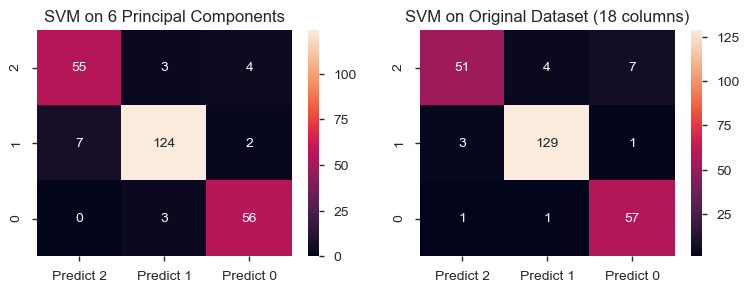

In [79]:
plt.figure(figsize = (14,10))
plt.subplot(3,3,1)
hm1 = sns.heatmap(df_cm1, annot=True, fmt='g')
plt.title("SVM on 6 Principal Components")

plt.subplot(3,3,2)
hm = sns.heatmap(df_cm, annot=True, fmt='g')
plt.title("SVM on Original Dataset (18 columns)")
plt.show()

**SVM with 7 Principal Components is very impressive. Both the models preditions are very close to each other.**

In [80]:
print("Classification Report For SVM on 7 Principal Components")
print("")
CR_SVM2 = metrics.classification_report(ytest_pca, pred2)
print(CR_SVM2)
print("----------------------------------------------------------")
print("Classification Report For SVM on Orignial dataset")
print("")
CR_SVM1 = metrics.classification_report(ytest1_upd, pred1)
print(CR_SVM1)

Classification Report For SVM on 7 Principal Components

              precision    recall  f1-score   support

           0       0.90      0.95      0.93        59
           1       0.95      0.93      0.94       133
           2       0.89      0.89      0.89        62

    accuracy                           0.93       254
   macro avg       0.91      0.92      0.92       254
weighted avg       0.93      0.93      0.93       254

----------------------------------------------------------
Classification Report For SVM on Orignial dataset

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        59
           1       0.96      0.97      0.97       133
           2       0.93      0.82      0.87        62

    accuracy                           0.93       254
   macro avg       0.92      0.92      0.92       254
weighted avg       0.93      0.93      0.93       254



**Classification report also proves that Precision, Recall, F1-Score and Accuracy scores are close between two SVM models.**

In [81]:
# calculate Area under the ROC curve 

def roc_multiclass(ytst, pred, average='macro'):
    uq_class = set(ytst)
    roc_auc_dict = {}
    for per_class in uq_class:
        o_class = [x for x in uq_class if x != per_class] # creates the list of all classes except current class
        n_ac_class = [0 if x in o_class else 1 for x in ytst] # marking the current value as 1 and all other classes as 0
        n_pred_class = [0 if x in o_class else 1 for x in pred]
        roc_auc = roc_auc_score(n_ac_class, n_pred_class, average=average)
        roc_auc_dict[per_class] = roc_auc
    return roc_auc_dict

In [83]:
print("SVM - with 7 Principal Components - Area under the ROC curve :\n", roc_multiclass(ytest_pca, pred2))
print("\nSVM - with 18 columns - Area under the ROC curve             :\n", roc_multiclass(ytest1_upd, pred1))

SVM - with 7 Principal Components - Area under the ROC curve :
 {0: 0.9591916558018254, 1: 0.9413720251040825, 2: 0.9253192204301075}

SVM - with 18 columns - Area under the ROC curve             :
 {0: 0.9625380269448067, 1: 0.9643012489902443, 2: 0.9008736559139785}


**No significant difference in Area under the ROC curver between two SVM models**

### Bagging classifier with underlying SVM on full dataset and 7 Principal components

In [84]:
# underlying SVM on full dataset

BC1_SVM1 = BaggingClassifier(base_estimator = SVM1, max_samples =.7, n_jobs = -1)
BC1_SVM1.fit(xtrain_upd_sc,ytrain1_upd)
BC1_SVM1_TR = BC1_SVM1.score(xtrain_upd_sc,ytrain1_upd)
BC1_SVM1_TS = BC1_SVM1.score(xtest_upd_sc,ytest1_upd)
print("Bagging Classifier Training score (with underlying SVM on full dataset) : ", round(BC1_SVM1_TR * 100, 2))
print("Bagging Classifier Test score (with underlying SVM on full dataset)     : ", round(BC1_SVM1_TS * 100, 2))

Bagging Classifier Training score (with underlying SVM on full dataset) :  96.96
Bagging Classifier Test score (with underlying SVM on full dataset)     :  93.7


In [85]:
# underlying SVM on 7 Principal components

BC1_SVM2 = BaggingClassifier(base_estimator = SVM2, max_samples =.7, n_jobs = -1)
BC1_SVM2.fit(xtrain_pca, ytrain_pca)
BC1_SVM2_TR = BC1_SVM2.score(xtrain_pca, ytrain_pca)
BC1_SVM2_TS = BC1_SVM2.score(xtest_pca, ytest_pca)
print("Bagging Classifier Training score (with underlying SVM on 7 Principal Components) : ", round(BC1_SVM2_TR * 100, 2))
print("Bagging Classifier Test score (with underlying SVM on 7 Principal Components)     : ", round(BC1_SVM2_TS * 100, 2))

Bagging Classifier Training score (with underlying SVM on 7 Principal Components) :  95.61
Bagging Classifier Test score (with underlying SVM on 7 Principal Components)     :  91.34


**Bagging classifier with all the columns have Accuracy score of 93.7, whereas Bagging classifier with only 7 principal components have Accuracy score of 91.3. With just 7 Principal components Bagging classifier returned Accuracy score close to full dataset.**

In [86]:
kfold = StratifiedKFold(n_splits=50)
cv_svm = cross_val_score(BC1_SVM1, x_upd_sc, y_upd, cv=kfold)
cv_bc1_svm1 = cv_svm.mean()
print("Cross Validation Score of Bagging classifier with SVM Model on full dataset: ", round(cv_bc1_svm1 * 100,2))

Cross Validation Score of Bagging classifier with SVM Model on full dataset:  94.96


In [87]:
kfold = StratifiedKFold(n_splits=50)
cv_svm = cross_val_score(BC1_SVM2, Xpca3, y_pca, cv=kfold)
cv_bc1_svm2 = cv_svm.mean()
print("Cross Validation Score of Bagging classifier with SVM Model on 7 Principal Components: ", round(cv_bc1_svm2 * 100,2))

Cross Validation Score of Bagging classifier with SVM Model on 7 Principal Components:  92.26


**Bagging classifier with all the columns had Cross Validation score of 94.9, whereas Bagging classifier with only 7 principal components have Cross validation score of 92.2. Bagging classifier with 7 Principal components is consistent with multiple train and test folds.**  

### Adaboost classifier with underlying SVM on full dataset and 7 Principal components

In [88]:
# underlying SVM on full dataset

AC1_SVM1 = AdaBoostClassifier(base_estimator = SVM1,n_estimators = 100, learning_rate=0.1)
AC1_SVM1.fit(xtrain_upd_sc,ytrain1_upd)
AC1_SVM1_TR = AC1_SVM1.score(xtrain_upd_sc,ytrain1_upd)
AC1_SVM1_TS = AC1_SVM1.score(xtest_upd_sc,ytest1_upd)
print("AdaBoost Classifier Training score (with underlying SVM on full dataset) : ", round(AC1_SVM1_TR * 100, 2))
print("AdaBoost Classifier Test score (with underlying SVM on full dataset)     : ", round(AC1_SVM1_TS * 100, 2))

AdaBoost Classifier Training score (with underlying SVM on full dataset) :  98.99
AdaBoost Classifier Test score (with underlying SVM on full dataset)     :  94.49


In [89]:
# underlying SVM on 7 Principal components

AC1_SVM2 = AdaBoostClassifier(base_estimator = SVM2,n_estimators = 100, learning_rate=0.1)
AC1_SVM2.fit(xtrain_pca, ytrain_pca)
AC1_SVM2_TR = AC1_SVM2.score(xtrain_pca, ytrain_pca)
AC1_SVM2_TS = AC1_SVM2.score(xtest_pca, ytest_pca)
print("AdaBoost Classifier Training score (with underlying SVM on 7 Principal Components) : ", round(AC1_SVM2_TR * 100, 2))
print("AdaBoost Classifier Test score (with underlying SVM on 7 Principal Components)     : ", round(AC1_SVM2_TS * 100, 2))

AdaBoost Classifier Training score (with underlying SVM on 7 Principal Components) :  99.66
AdaBoost Classifier Test score (with underlying SVM on 7 Principal Components)     :  90.16


**AdaBoost classifier with all the columns have Accuracy score of 94.4, whereas AdaBoost classifier with only 7 principal components have Accuracy score of 91. With just 7 Principal components Bagging classifier returned Accuracy score close to full dataset.**

In [90]:
kfold = StratifiedKFold(n_splits=10)
cv_svm = cross_val_score(AC1_SVM1, x_upd_sc, y_upd, cv=kfold)
cv_ac1_svm1 = cv_svm.mean()
print("Cross Validation Score of AdaBoost classifier with SVM Model on full dataset: ", round(cv_ac1_svm1 * 100,2))

Cross Validation Score of AdaBoost classifier with SVM Model on full dataset:  95.98


In [91]:
kfold = StratifiedKFold(n_splits=10)
cv_svm = cross_val_score(AC1_SVM2, Xpca3, y_pca, cv=kfold)
cv_ac1_svm2 = cv_svm.mean()
print("Cross Validation Score of AdaBoost classifier with SVM Model on 7 Principal Components: ", round(cv_ac1_svm2 * 100,2))

Cross Validation Score of AdaBoost classifier with SVM Model on 7 Principal Components:  91.73


**AdaBoost classifier with all the columns had Cross Validation score of 95.9, whereas AdaBoost classifier with only 7 principal components have Cross validation score of 91.7. AdaBoost classifier with 7 Principal components is consistent with multiple train and test folds.**  

### Models Comparison

In [92]:
# Loading the values in a dataframe

mod_dict = {'Model': ['SVM', 'SVM (PCA)', 'Bagging SVM', 'Bagging SVM (PCA)', 'AdaBoost SVM', 'AdaBoost SVM (PCA)'], 
     'Train_Score': [SVM1_TR, SVM2_TR, BC1_SVM1_TR, BC1_SVM2_TR, AC1_SVM1_TR, AC1_SVM2_TR], 
     'Test_Score': [SVM1_TS, SVM2_TS, BC1_SVM1_TS, BC1_SVM2_TS, AC1_SVM1_TS, AC1_SVM2_TS], 
     'Cross_Val_Score': [cv_svm_f.mean(), cv_svm_pca.mean(), cv_bc1_svm1, cv_bc1_svm2, cv_ac1_svm1, cv_ac1_svm2]} 
          
df_mod = pd.DataFrame(mod_dict)

df_mod = df_mod.set_index('Model')
df_mod

Train_Score  Test_Score  Cross_Val_Score
Model                                                       
SVM                    0.972973    0.933071         0.956160
SVM (PCA)              0.967905    0.925197         0.925958
Bagging SVM            0.969595    0.937008         0.949572
Bagging SVM (PCA)      0.956081    0.913386         0.922587
AdaBoost SVM           0.989865    0.944882         0.959786
AdaBoost SVM (PCA)     0.996622    0.901575         0.917291

Comparison of Model performances between Full dataset and Principal Components


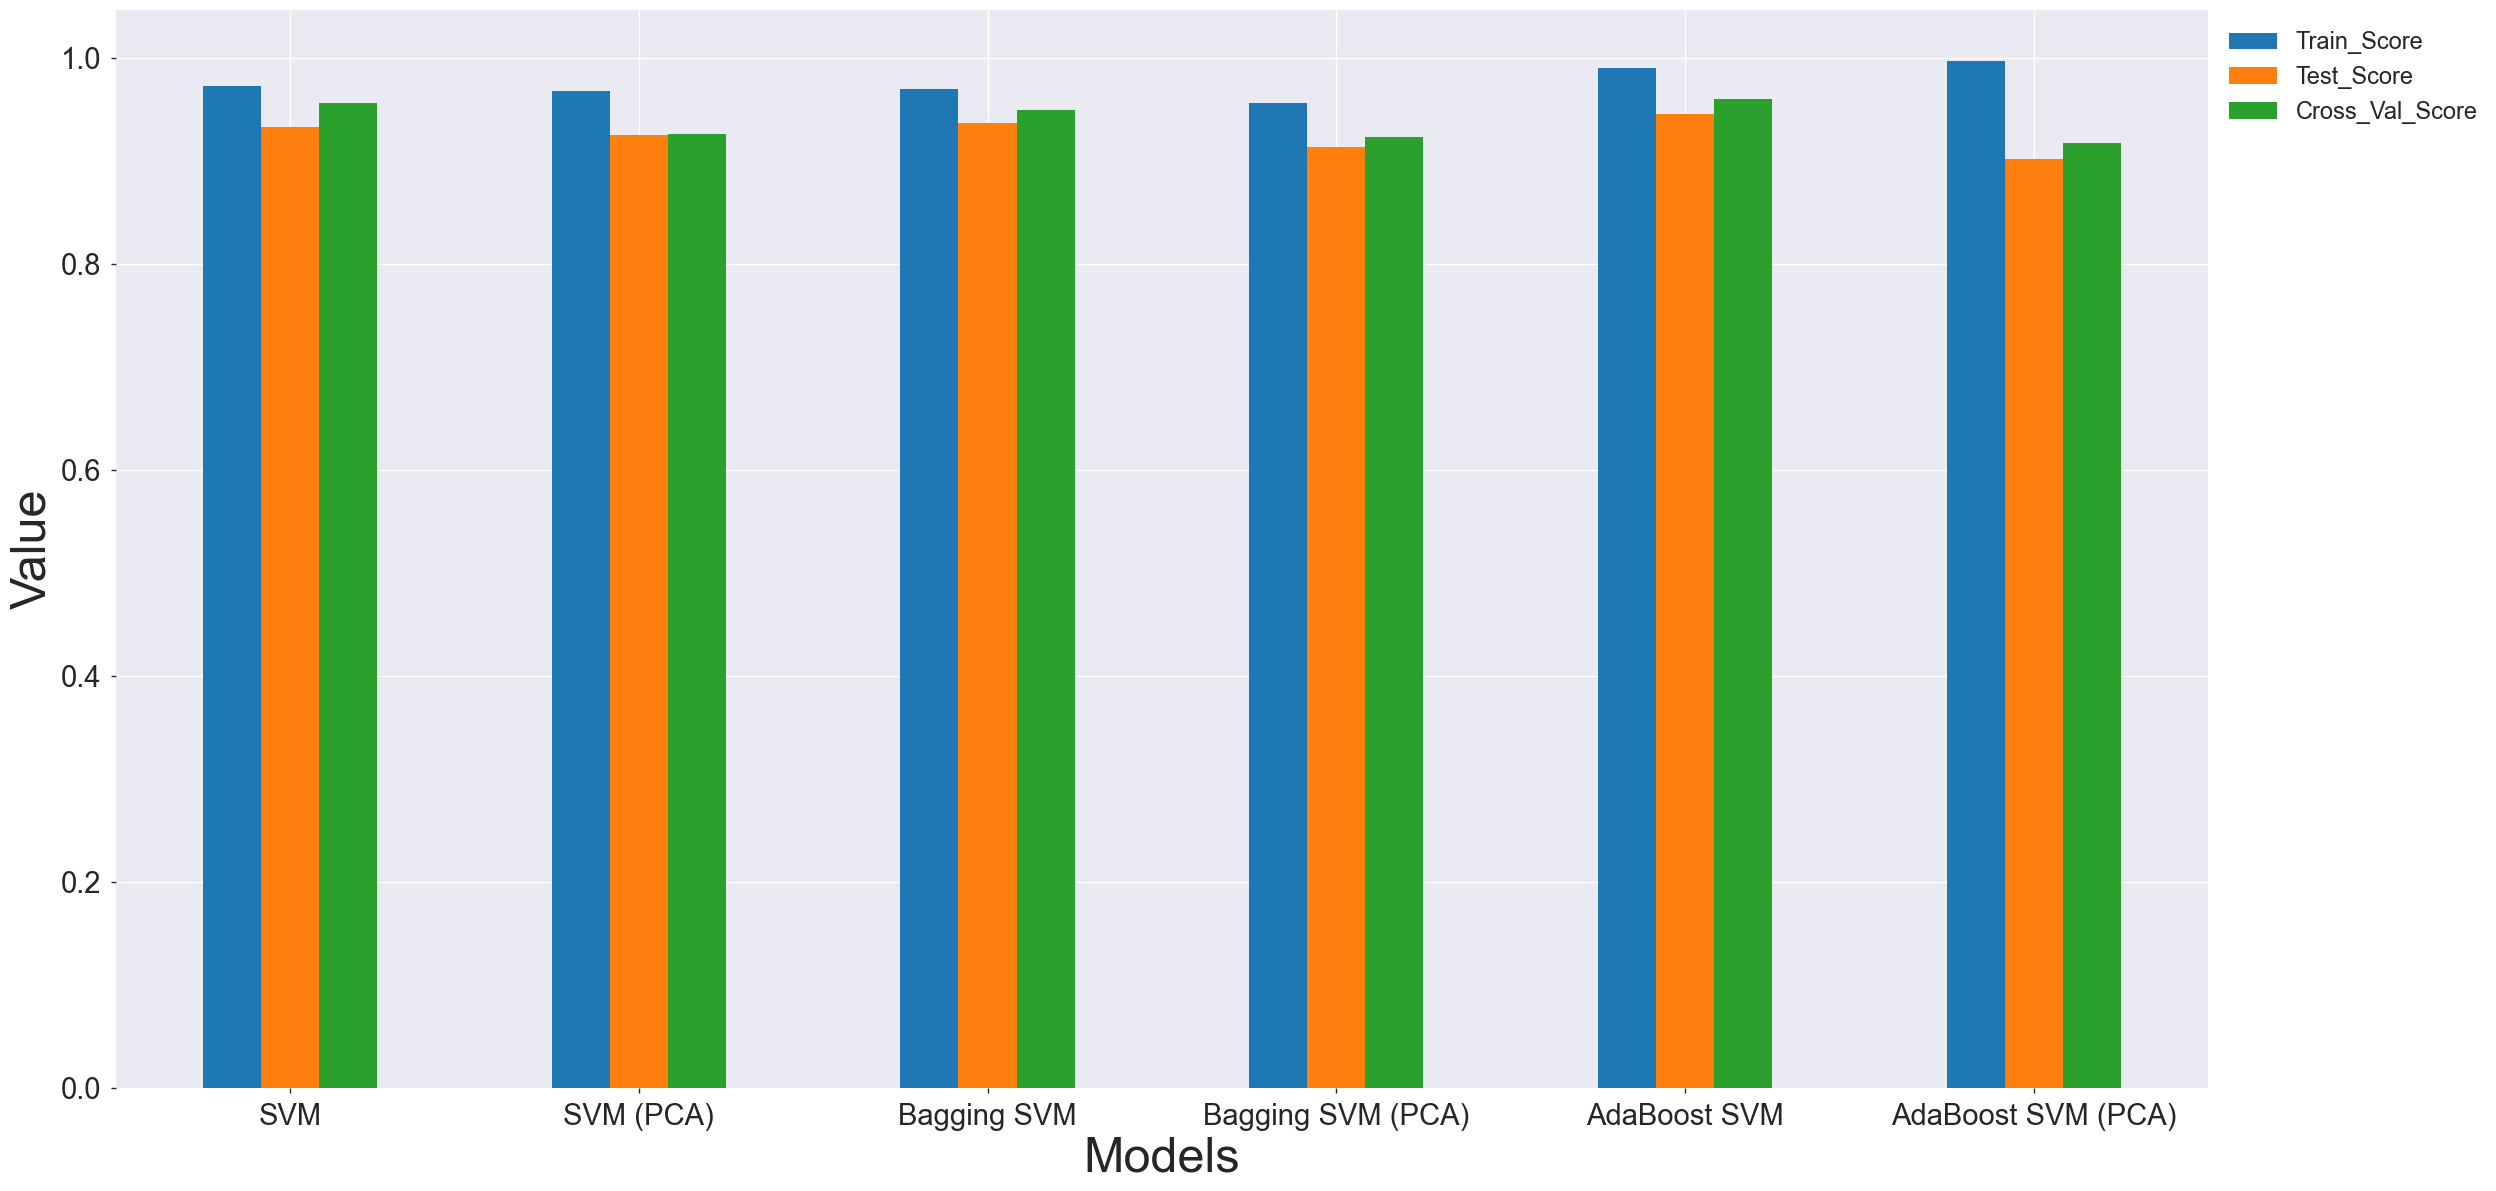

In [103]:
# Plot the bar chart
print("Comparison of Model performances between Full dataset and Principal Components")
ax = df_mod.plot(kind='bar', rot=0, figsize = (27,14), fontsize = 21) 
ax.legend(bbox_to_anchor=(1, 1), prop={'size': 17})
ax.set_ylabel("Value", fontsize=35)
ax.set_xlabel("Models", fontsize=35)
plt.show()

**Observations -**

* **Between SVM, SVM (PCA), Bagging SVM and Bagging SVM (PCA) models - there is no significant difference between Test score and Cross validation score, which means these models delivers almost equal performance with just 7 principal components.**  


* **Between AdaBoost SVM and AdaBoost SVM (PCA) - there is little significant difference between Test score and Cross validation score. AdaBoost SVM (PCA) could have performed better with additional one or two principal components.** 

## Conclusion

The assignment is to compare performances of the model built on full dataset Versus model built on Principal components (after applying dimensionality reduction technique).  

**Points to consider -** 

1) There are 18 independent and 1 dependent features in the dataset. Outliers and Missing values are handled before applying PCA.

2) This vehicle dataset has many features which are having a strong correlation with other features. Highly correlated features were removed and fed as input to SVM, Bagging Classifier and AdaBoost Classifier. Note, these correlated features were included before applying PCA (PCA has been applied on all 18 Features).

3) Dimensionality reduction technique(PCA) has been applied on 18 independent columns, and chosen 7 Principal components which captures approx. 95% of variance of data. Pair plot shows no linear correlation between the 7 Principal components, which means the Principal components are truly independent between each other.

4) To verify performance, multiple models were built in this assignment - 

    a. SVM (with full dataset) 
    b. SVM (with 7 Principal components)
    c. Bagging classifier with underlying SVM (with full dataset)
    d. Bagging classifier with underlying SVM (with 7 Principal components)
    e. AdaBoost classfier with underlying SVM (with full dataset)
    f. AdaBoost classfier with underlying SVM (with 7 Principal components)

5) Confusion Matrix and Classfication report are generated for first 2 models (SVM on full dataset and SVM on PCA). Values in Confusion matrix (TP, TN, FP, FN) are very close between 2 models. Values in Classfication report(Recall, Precision, Accuracy, F1 Score) are also very close between the 2 models. 

6) There is no significant difference between Test score and Cross validation score between SVM/SVM (PCA), Bagging SVM/Bagging SVM (PCA) models. Models with just 7 principal components delivers almost equal performance.  

7) There is little significant difference between Test score and Cross validation score between AdaBoost SVM and AdaBoost SVM (PCA) models.  

**Final Words -** 

  **PCA has improved model efficiency (by reducing 18 columns to 7 principal components) and avoided model getting overfit. SVM, Bagging(SVM) and AdaBoost(SVM) models peformed amazingly well with 7 Principal components. This does not prove that PCA will perform good on all the datasets. As there were some strongly correlated features present in Vehicle dataset, PCA performed very well on this dataset. Therefore, Principal Component Analysis (one of the dimensionality reduction technique) should be applied on datasets which has strongly correlated features.** 